In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/Harmonie_wrf_ml/distan_lat42.22lon-8.63p2R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

**Load actual data (wind direction and wind speed) from station (dir -1 means variable direcction)**

In [ ]:
import pandas as pd
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/Harmonie_wrf_ml/LEVXY2021Y2023.csv",
                          usecols = ["time","dir_o","spd_o"],
                          parse_dates=["time"]).set_index("time")
station.describe()

dir_o         spd_o
count  23129.000000  23123.000000
mean     155.337325      3.056673
std      113.621368      1.914485
min       -1.000000      0.000000
25%       20.000000      1.543332
50%      200.000000      2.572220
75%      240.000000      4.115552
max      360.000000     17.491096

**Climatology labeled and relationship variable wind (VRB) and wind intensity**

In [ ]:
#wind direction to interval dir=-1 variable wind
interval = pd.IntervalIndex.from_tuples([(-1.5, -0.5),(-0.5,20), (20, 40), (40, 60),
                                           (60,80),(80,100),(100,120),(120,140),(140,160),
                                           (160,180),(180,200),(200,220),(220,240),
                                           (240,260),(260,280),(280,300),(300,320),
                                           (320,340),(340,360)])

labels = ['VRB', '[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]',
          '(100, 120]', '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]',
          '(200, 220]','(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]',
          '(300, 320]', '(320, 340]', '(340, 360]']

station["dir_l"] = pd.cut(station["dir_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')


#observed climatology
print("wind direction climatology\n")
print(station["dir_l"].value_counts(normalize= True).transform(lambda x: '{:,.0%}'.format(x)))

station["spd_o_kt"]=np.rint(station["spd_o"]*1.94384)
print("\nwind intensity percentage (kt) when wind variable\n")
print(station[station.dir_l=="VRB"]["spd_o_kt"].value_counts(normalize = True).transform(lambda x: '{:,.0%}'.format(x)))
print("\nwind direction when wind speed equal or less than 3 kt\n")
station[station.spd_o_kt<=3]["dir_l"].value_counts(normalize = True).transform(lambda x: '{:,.0%}'.format(x))


wind direction climatology

VRB           19%
(180, 200]    15%
(200, 220]    12%
(220, 240]     9%
[0, 20]        7%
(260, 280]     6%
(240, 260]     6%
(20, 40]       5%
(160, 180]     5%
(340, 360]     3%
(280, 300]     3%
(40, 60]       3%
(300, 320]     2%
(320, 340]     1%
(60, 80]       1%
(140, 160]     1%
(80, 100]      1%
(100, 120]     1%
(120, 140]     0%
Name: dir_l, dtype: object

wind intensity percentage (kt) when wind variable

2.0     46%
1.0     26%
3.0     12%
4.0      7%
5.0      4%
6.0      2%
7.0      1%
8.0      1%
9.0      0%
11.0     0%
10.0     0%
12.0     0%
13.0     0%
14.0     0%
15.0     0%
Name: spd_o_kt, dtype: object

wind direction when wind speed equal or less than 3 kt



VRB           57%
[0, 20]        9%
(220, 240]     5%
(200, 220]     3%
(240, 260]     3%
(20, 40]       3%
(180, 200]     3%
(340, 360]     3%
(260, 280]     2%
(280, 300]     2%
(40, 60]       2%
(320, 340]     2%
(300, 320]     2%
(160, 180]     2%
(100, 120]     1%
(80, 100]      1%
(140, 160]     1%
(60, 80]       1%
(120, 140]     0%
Name: dir_l, dtype: object

**Forecast D0 Harmonie**

In [ ]:
#forecast d0
model_h = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/Harmonie_wrf_ml/lat42.22lon-8.63p2R1KmD0_h.csv",parse_dates=["time"]).set_index("time")
model_h

dir0  snow_prec0  isocero0  mod0  racha_u0  racha_v0  \
time                                                                          
2021-12-01 00:00:00   69.51           0   1966.10  0.16     -0.27     -0.09   
2021-12-01 01:00:00  139.15           0   2003.55  0.25     -0.24      0.30   
2021-12-01 02:00:00  126.09           0   2161.32  0.79     -0.89      0.71   
2021-12-01 03:00:00  146.36           0   2023.51  1.19     -0.96      1.57   
2021-12-01 04:00:00  161.50           0   1939.89  0.77     -0.34      1.17   
...                     ...         ...       ...   ...       ...       ...   
2023-03-15 19:00:00  305.26           0   1640.09  2.13      2.87     -2.21   
2023-03-15 20:00:00  308.34           0   1674.70  1.20      1.45     -1.25   
2023-03-15 21:00:00  323.48           0   1632.16  0.32      0.29     -0.43   
2023-03-15 22:00:00   80.75           0   1595.49  1.03     -1.68     -0.20   
2023-03-15 23:00:00  250.86           0   1658.99  0.50      0.73      0.22   

                         mslp0   temp0   rh0  visibility0  ...     cape1  \
time                                                       ...             
2021-12-01 00:00:00  100237.00  280.77  0.96      4059.89  ... -14176.54   
2021-12-01 01:00:00  100189.50  280.40  0.94      9189.69  ...     -0.88   
2021-12-01 02:00:00  100138.34  280.94  0.95      7637.18  ...     -0.63   
2021-12-01 03:00:00  100092.60  281.09  0.97      3359.18  ...     -0.61   
2021-12-01 04:00:00  100037.55  281.71  0.93     10551.13  ...     -0.24   
...                        ...     ...   ...          ...  ...       ...   
2023-03-15 19:00:00   98969.20  284.56  0.87     15984.84  ... -12319.16   
2023-03-15 20:00:00   98957.14  283.02  0.94     10792.88  ... -13695.14   
2023-03-15 21:00:00   98937.27  282.00  0.97      3531.59  ... -14594.07   
2023-03-15 22:00:00   98855.00  281.54  0.95      6014.87  ... -15026.39   
2023-03-15 23:00:00   98838.00  281.06  0.93     10607.39  ... -15701.16   

                        cin1  cfh1  cfl1  cfm1  cft1   HGT5001   HGT8501  \
time                                                                       
2021-12-01 00:00:00   3240.0  0.07  0.12  0.00  0.18  56205.03  15365.16   
2021-12-01 01:00:00  10756.0  0.54  0.99  0.00  1.00  56150.84  15324.68   
2021-12-01 02:00:00  15854.0  1.00  1.00  0.02  1.00  56078.43  15267.43   
2021-12-01 03:00:00   9198.0  1.00  1.00  0.02  1.00  56038.57  15241.89   
2021-12-01 04:00:00   7302.0  1.00  1.00  0.00  1.00  56013.51  15197.96   
...                      ...   ...   ...   ...   ...       ...       ...   
2023-03-15 19:00:00   4359.0  0.00  0.00  0.00  0.00  55919.75  14493.48   
2023-03-15 20:00:00   3242.0  0.86  0.00  0.00  0.86  55875.79  14474.95   
2023-03-15 21:00:00   3242.0  1.00  0.00  0.00  1.00  55839.30  14450.24   
2023-03-15 22:00:00   3242.0  1.00  0.00  0.00  1.00  55841.84  14383.06   
2023-03-15 23:00:00   4050.0  0.87  0.00  0.00  0.87  55804.80  14342.79   

                      T5001   T8501  
time                                 
2021-12-01 00:00:00  255.05  277.22  
2021-12-01 01:00:00  254.83  276.93  
2021-12-01 02:00:00  254.60  277.25  
2021-12-01 03:00:00  254.18  276.96  
2021-12-01 04:00:00  254.43  276.63  
...                     ...     ...  
2023-03-15 19:00:00  257.83  283.26  
2023-03-15 20:00:00  257.68  283.32  
2023-03-15 21:00:00  258.16  283.05  
2023-03-15 22:00:00  257.74  283.40  
2023-03-15 23:00:00  257.97  282.50  

[11280 rows x 52 columns]

**Delete rows with wind direction variable obseved**

In [ ]:
#concat station vs meteorological  model. Delete variable (VRB) observed direction
df_vrb = pd.concat([station,model_h],axis=1).drop(columns=["spd_o","spd_o_kt"]).dropna()
df_all_h = df_vrb[df_vrb.dir_o!=-1]
df_all_h

dir_o       dir_l    dir0  snow_prec0  isocero0  mod0  \
time                                                                         
2021-12-01 00:00:00  220.0  (200, 220]   69.51         0.0   1966.10  0.16   
2021-12-01 01:00:00  220.0  (200, 220]  139.15         0.0   2003.55  0.25   
2021-12-01 02:00:00  220.0  (200, 220]  126.09         0.0   2161.32  0.79   
2021-12-01 03:00:00  220.0  (200, 220]  146.36         0.0   2023.51  1.19   
2021-12-01 04:00:00  210.0  (200, 220]  161.50         0.0   1939.89  0.77   
...                    ...         ...     ...         ...       ...   ...   
2023-03-14 19:00:00  270.0  (260, 280]  274.20         0.0   1807.90  1.92   
2023-03-14 20:00:00  210.0  (200, 220]  286.38         0.0   1908.94  1.50   
2023-03-14 21:00:00  210.0  (200, 220]  249.59         0.0   1871.24  0.87   
2023-03-14 22:00:00  220.0  (200, 220]  143.74         0.0   1819.25  1.09   
2023-03-14 23:00:00  220.0  (200, 220]  119.99         0.0   1756.19  0.79   

                     racha_u0  racha_v0      mslp0   temp0  ...     cape1  \
time                                                        ...             
2021-12-01 00:00:00     -0.27     -0.09  100237.00  280.77  ... -14176.54   
2021-12-01 01:00:00     -0.24      0.30  100189.50  280.40  ...     -0.88   
2021-12-01 02:00:00     -0.89      0.71  100138.34  280.94  ...     -0.63   
2021-12-01 03:00:00     -0.96      1.57  100092.60  281.09  ...     -0.61   
2021-12-01 04:00:00     -0.34      1.17  100037.55  281.71  ...     -0.24   
...                       ...       ...        ...     ...  ...       ...   
2023-03-14 19:00:00      3.35     -0.38   99867.76  285.11  ...     -0.73   
2023-03-14 20:00:00      2.52     -0.85   99901.39  284.96  ...     -0.55   
2023-03-14 21:00:00      1.52      0.50   99906.75  284.80  ...     -0.15   
2023-03-14 22:00:00     -1.05      1.56   99886.49  284.22  ...     -0.47   
2023-03-14 23:00:00     -1.16      0.74   99869.69  283.30  ...     -0.48   

                        cin1  cfh1  cfl1  cfm1  cft1   HGT5001   HGT8501  \
time                                                                       
2021-12-01 00:00:00   3240.0  0.07  0.12  0.00  0.18  56205.03  15365.16   
2021-12-01 01:00:00  10756.0  0.54  0.99  0.00  1.00  56150.84  15324.68   
2021-12-01 02:00:00  15854.0  1.00  1.00  0.02  1.00  56078.43  15267.43   
2021-12-01 03:00:00   9198.0  1.00  1.00  0.02  1.00  56038.57  15241.89   
2021-12-01 04:00:00   7302.0  1.00  1.00  0.00  1.00  56013.51  15197.96   
...                      ...   ...   ...   ...   ...       ...       ...   
2023-03-14 19:00:00  10736.0  0.93  0.99  0.00  1.00  56128.31  15035.52   
2023-03-14 20:00:00   6768.0  0.95  1.00  0.00  1.00  56184.24  15056.29   
2023-03-14 21:00:00   6768.0  0.93  1.00  0.00  1.00  56221.86  15064.11   
2023-03-14 22:00:00   5412.0  0.71  0.60  0.00  0.88  56251.92  15043.78   
2023-03-14 23:00:00   6274.0  0.85  0.48  0.00  0.92  56249.18  15024.13   

                      T5001   T8501  
time                                 
2021-12-01 00:00:00  255.05  277.22  
2021-12-01 01:00:00  254.83  276.93  
2021-12-01 02:00:00  254.60  277.25  
2021-12-01 03:00:00  254.18  276.96  
2021-12-01 04:00:00  254.43  276.63  
...                     ...     ...  
2023-03-14 19:00:00  256.50  275.67  
2023-03-14 20:00:00  256.91  275.74  
2023-03-14 21:00:00  257.13  275.81  
2023-03-14 22:00:00  257.13  276.38  
2023-03-14 23:00:00  256.88  276.61  

[9032 rows x 54 columns]

**Label meteorological points 0**

In [ ]:
#label meteorological model variables dir0 and dir1
df_all_h["dir0_l"] = pd.cut(df_all_h["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')


df_all_h[["dir_l","dir0_l"]].sample(20)

<ipython-input-8-d9e6c7fb0d10>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dir_l      dir0_l
time                                       
2022-09-21 13:00:00  (240, 260]  (300, 320]
2023-01-28 17:00:00    (40, 60]    (20, 40]
2022-05-14 23:00:00  (180, 200]  (160, 180]
2022-10-27 04:00:00  (220, 240]  (180, 200]
2022-03-16 07:00:00     [0, 20]     [0, 20]
2022-08-29 04:00:00  (240, 260]  (300, 320]
2022-07-14 11:00:00  (240, 260]  (160, 180]
2021-12-29 18:00:00  (180, 200]  (140, 160]
2021-12-09 03:00:00  (180, 200]  (260, 280]
2022-01-30 16:00:00     [0, 20]  (340, 360]
2022-05-04 17:00:00  (340, 360]     [0, 20]
2022-03-13 18:00:00  (200, 220]  (120, 140]
2023-01-21 06:00:00  (340, 360]  (340, 360]
2023-02-10 06:00:00  (100, 120]  (140, 160]
2023-02-03 05:00:00  (200, 220]  (120, 140]
2022-01-29 17:00:00  (240, 260]  (160, 180]
2022-11-27 03:00:00  (180, 200]  (140, 160]
2023-01-09 13:00:00  (160, 180]  (260, 280]
2022-03-18 21:00:00     [0, 20]  (340, 360]
2022-10-06 17:00:00  (280, 300]  (280, 300]

**meteorological model score point 0**

****

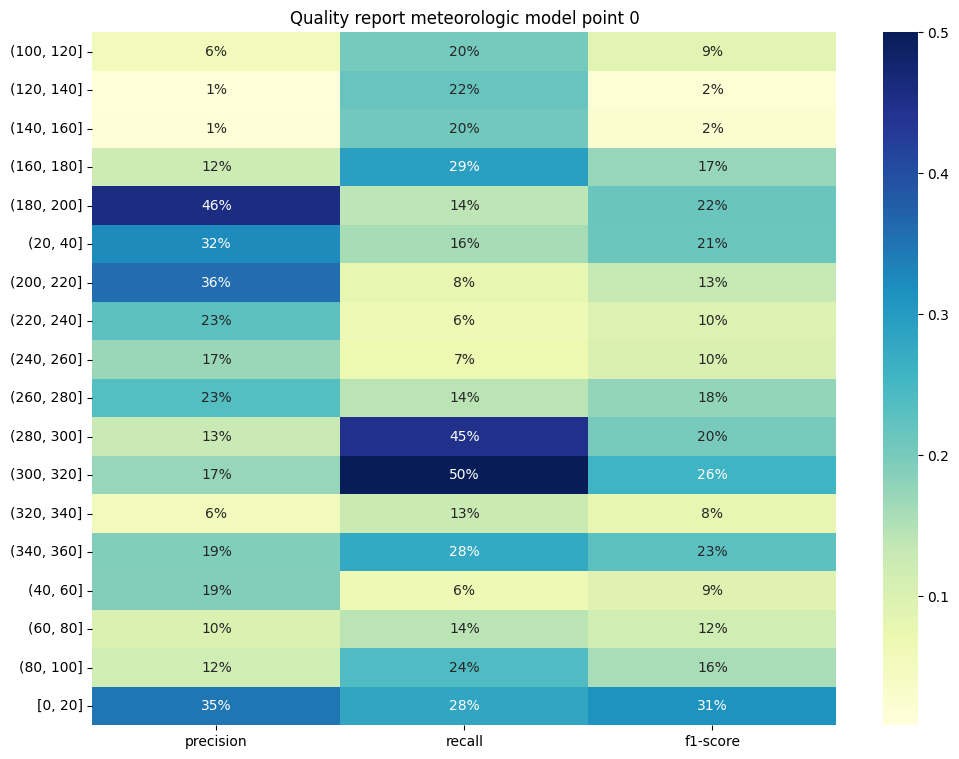

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model point 0")
cr = pd.DataFrame(classification_report(df_all_h.dir_l, df_all_h.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

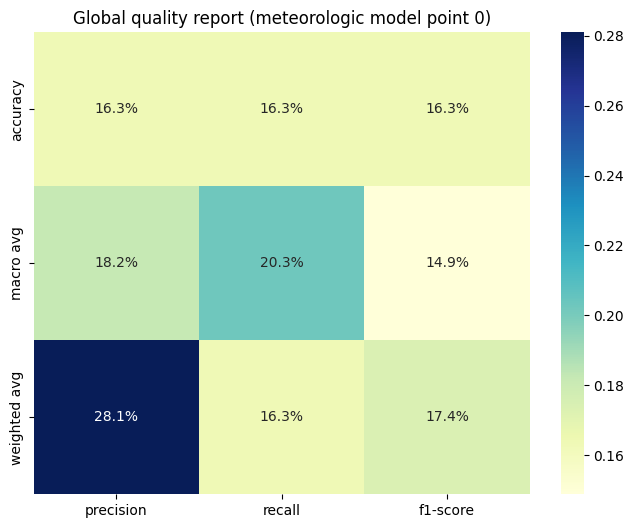

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 0)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

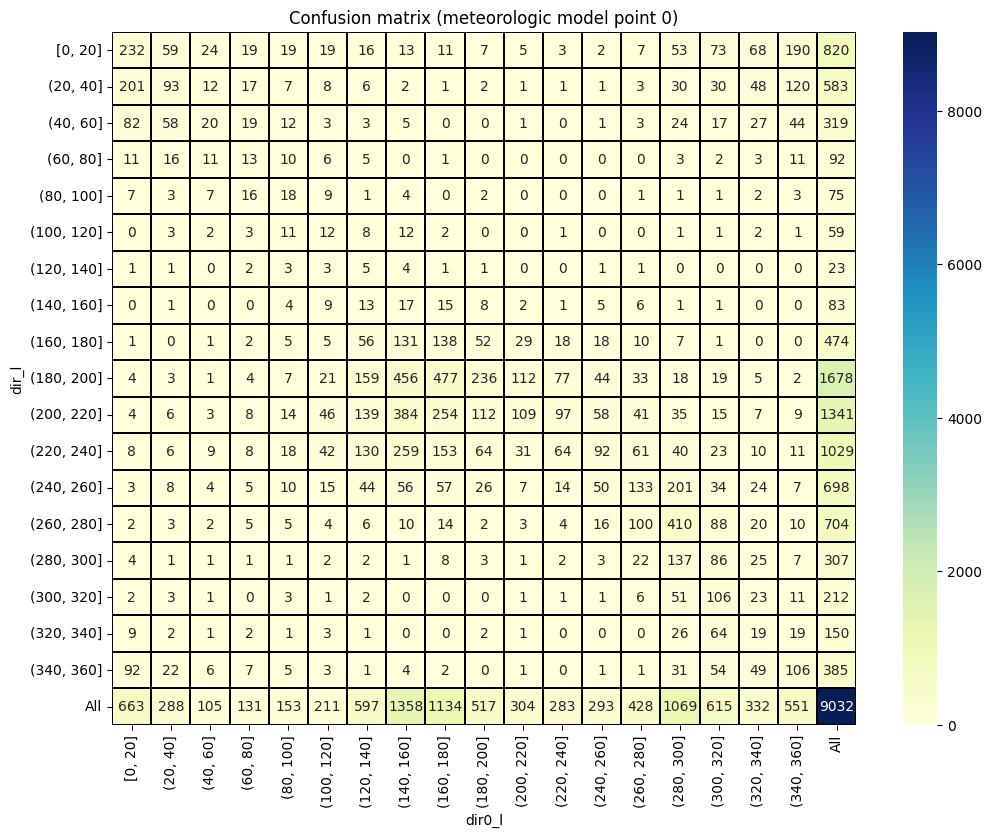

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model point 0)")

global_sc = pd.crosstab(df_all_h.dir_l, df_all_h.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');

<ipython-input-12-c36c1041b4d5>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



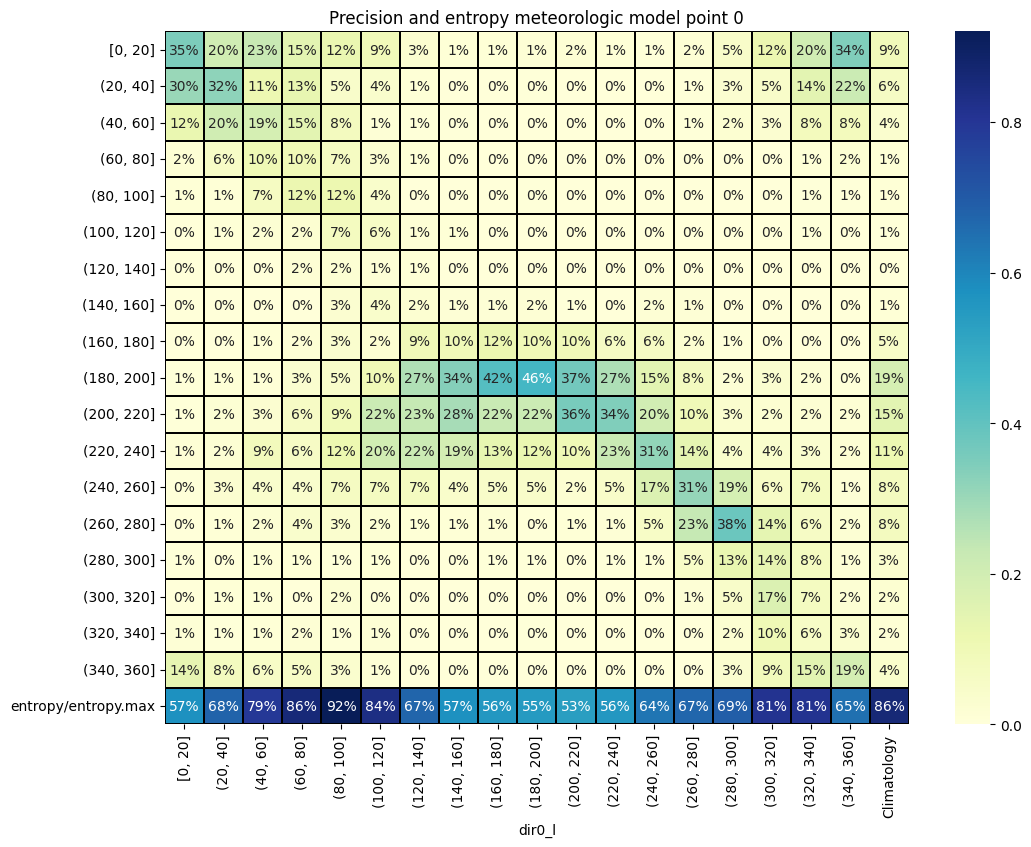

In [ ]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model point 0")
column_sc = pd.crosstab(df_all_h.dir_l, df_all_h.dir0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');

**Test association between observed variable and meteorological model (point 0) (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [ ]:
#two way table
pd.crosstab(df_all_h.dir_l,df_all_h.dir0_l)

dir0_l      [0, 20]  (20, 40]  (40, 60]  (60, 80]  (80, 100]  (100, 120]  \
dir_l                                                                      
[0, 20]         232        59        24        19         19          19   
(20, 40]        201        93        12        17          7           8   
(40, 60]         82        58        20        19         12           3   
(60, 80]         11        16        11        13         10           6   
(80, 100]         7         3         7        16         18           9   
(100, 120]        0         3         2         3         11          12   
(120, 140]        1         1         0         2          3           3   
(140, 160]        0         1         0         0          4           9   
(160, 180]        1         0         1         2          5           5   
(180, 200]        4         3         1         4          7          21   
(200, 220]        4         6         3         8         14          46   
(220, 240]        8         6         9         8         18          42   
(240, 260]        3         8         4         5         10          15   
(260, 280]        2         3         2         5          5           4   
(280, 300]        4         1         1         1          1           2   
(300, 320]        2         3         1         0          3           1   
(320, 340]        9         2         1         2          1           3   
(340, 360]       92        22         6         7          5           3   

dir0_l      (120, 140]  (140, 160]  (160, 180]  (180, 200]  (200, 220]  \
dir_l                                                                    
[0, 20]             16          13          11           7           5   
(20, 40]             6           2           1           2           1   
(40, 60]             3           5           0           0           1   
(60, 80]             5           0           1           0           0   
(80, 100]            1           4           0           2           0   
(100, 120]           8          12           2           0           0   
(120, 140]           5           4           1           1           0   
(140, 160]          13          17          15           8           2   
(160, 180]          56         131         138          52          29   
(180, 200]         159         456         477         236         112   
(200, 220]         139         384         254         112         109   
(220, 240]         130         259         153          64          31   
(240, 260]          44          56          57          26           7   
(260, 280]           6          10          14           2           3   
(280, 300]           2           1           8           3           1   
(300, 320]           2           0           0           0           1   
(320, 340]           1           0           0           2           1   
(340, 360]           1           4           2           0           1   

dir0_l      (220, 240]  (240, 260]  (260, 280]  (280, 300]  (300, 320]  \
dir_l                                                                    
[0, 20]              3           2           7          53          73   
(20, 40]             1           1           3          30          30   
(40, 60]             0           1           3          24          17   
(60, 80]             0           0           0           3           2   
(80, 100]            0           0           1           1           1   
(100, 120]           1           0           0           1           1   
(120, 140]           0           1           1           0           0   
(140, 160]           1           5           6           1           1   
(160, 180]          18          18          10           7           1   
(180, 200]          77          44          33          18          19   
(200, 220]          97          58          41          35          15   
(220, 240]          64          92  

**All cells must be more than five!!!. No Chi square test posible**

In [ ]:
from scipy.stats import chi2_contingency

alpha = 0.01

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(pd.crosstab(df_all_h.dir_l,df_all_h.dir0_l))

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables

print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between meteorological model variables and observed values")
else:
    print("Retain H0,There is no association between meteorological model variables and observed values")

p-value: 0.0
Significance level: 0.01
Degres of of freedom:  289
Stadistic 12995.593509861188
Reject H0,There is an association between meteorological model variables and observed values


In [ ]:
df_vrb.iloc[:,2:].columns

Index(['dir0', 'snow_prec0', 'isocero0', 'mod0', 'racha_u0', 'racha_v0',
       'mslp0', 'temp0', 'rh0', 'visibility0', 'lhevapac0', 'lhsublac0',
       'lwflx0', 'prec0', 'swflx0', 'shflxac0', 'cape0', 'cin0', 'cfh0',
       'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1',
       'snow_prec1', 'isocero1', 'mod1', 'racha_u1', 'racha_v1', 'mslp1',
       'temp1', 'rh1', 'visibility1', 'lhevapac1', 'lhsublac1', 'lwflx1',
       'prec1', 'swflx1', 'shflxac1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
       'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501'],
      dtype='object')

**Machine learning**

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [03:23<00:00,  7.00s/it]


In [ ]:
models

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.43               0.29    None      0.42   
RandomForestClassifier             0.42               0.27    None      0.41   
LabelSpreading                     0.35               0.26    None      0.35   
LabelPropagation                   0.35               0.25    None      0.35   
BaggingClassifier                  0.38               0.25    None      0.37   
KNeighborsClassifier               0.36               0.24    None      0.35   
LGBMClassifier                     0.41               0.24    None      0.39   
GaussianNB                         0.16               0.23    None      0.15   
LinearDiscriminantAnalysis         0.34               0.22    None      0.32   
ExtraTreeClassifier                0.30               0.21    None      0.30   
SVC                                0.40               0.21    None      0.36   
LogisticRegression                 0.37               0.20    None      0.34   
NearestCentroid                    0.19               0.20    None      0.19   
DecisionTreeClassifier             0.29               0.20    None      0.29   
BernoulliNB                        0.25               0.20    None      0.23   
CalibratedClassifierCV             0.36               0.18    None      0.32   
LinearSVC                          0.36               0.18    None      0.31   
SGDClassifier                      0.28               0.17    None      0.26   
AdaBoostClassifier                 0.30               0.17    None      0.26   
QuadraticDiscriminantAnalysis      0.12               0.17    None      0.07   
RidgeClassifierCV                  0.35               0.16    None      0.28   
RidgeClassifier                    0.35               0.15    None      0.28   
Perceptron                         0.28               0.15    None      0.25   
PassiveAggressiveClassifier        0.25               0.14    None      0.21   
DummyClassifier                    0.20               0.05    None      0.07   

                               Time Taken  
Model                                      
ExtraTreesClassifier                 3.67  
RandomForestClassifier               7.75  
LabelSpreading                      11.53  
LabelPropagation                     4.09  
BaggingClassifier                    4.99  
KNeighborsClassifier                 0.27  
LGBMClassifier                      20.32  
GaussianNB                           0.08  
LinearDiscriminantAnalysis           0.23  
ExtraTreeClassifier                  0.13  
SVC                                  8.59  
LogisticRegression                   1.16  
NearestCentroid                      0.11  
DecisionTreeClassifier               0.91  
BernoulliNB                          0.20  
CalibratedClassifierCV             102.40  
LinearSVC                           28.23  
SGDClassifier                        2.77  
AdaBoostClassifier                   3.86  
QuadraticDiscriminantAnalysis        0.18  
RidgeClassifierCV                    0.36  
RidgeClassifier                      0.16  
Perceptron                           0.33  
PassiveAggressiveClassifier          0.50  
DummyClassifier                      0.08

**Compare Machine learning accuracy vs meteorological model accuracy point 0 without variable wind.**

<ipython-input-16-f9e93d3d8a0c>:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     3.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.500000  0.058824  0.105263    17.000000
(160, 180]     0.344828  0.161290  0.219780    62.000000
(180, 200]     0.564815  0.693182  0.622449   264.000000
(20, 40]       0.480519  0.402174  0.437870    92.000000
(200, 220]     0.396226  0.417910  0.406780   201.000000
(220, 240]     0.443750  0.486301  0.464052   146.000000
(240, 260]     0.381443  0.316239  0.345794   117.000000
(260, 280]     0.527559  0.614679  0.567797   109.000000
(280, 300]     0.305556  0.200000  0.241758    55.000000
(300, 320]     0.352941  0.363636  0.358209    33.000000
(320, 340]     0.416667  0.227273  0.294118    22.000000
(340, 360]     0.317073  0.254902  0.282609    51.000000
(40, 60]       0.263158  0.227273  0.243902    44.000000
(60, 80]       0.500000  0.384615  0.434783    13.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-16-f9e93d3d8a0c>:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.333333  0.125000  0.181818    16.000000
(120, 140]     0.000000  0.000000  0.000000     1.000000
(140, 160]     0.200000  0.100000  0.133333    10.000000
(160, 180]     0.483871  0.192308  0.275229    78.000000
(180, 200]     0.506211  0.690678  0.584229   236.000000
(20, 40]       0.411765  0.384615  0.397727    91.000000
(200, 220]     0.440000  0.451282  0.445570   195.000000
(220, 240]     0.402778  0.397260  0.400000   146.000000
(240, 260]     0.387500  0.254098  0.306931   122.000000
(260, 280]     0.460432  0.673684  0.547009    95.000000
(280, 300]     0.260870  0.136364  0.179104    44.000000
(300, 320]     0.457143  0.470588  0.463768    34.000000
(320, 340]     0.250000  0.111111  0.153846    27.000000
(340, 360]     0.171429  0.103448  0.129032    58.000000
(40, 60]       0.379310  0.211538  0.271605    52.000000
(60, 80]       0.428571  0.130435  0.200000    23.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-16-f9e93d3d8a0c>:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.166667  0.111111  0.133333     9.000000
(120, 140]     0.000000  0.000000  0.000000     6.000000
(140, 160]     0.000000  0.000000  0.000000    17.000000
(160, 180]     0.419355  0.175676  0.247619    74.000000
(180, 200]     0.538690  0.690840  0.605351   262.000000
(20, 40]       0.391304  0.397059  0.394161    68.000000
(200, 220]     0.406114  0.436620  0.420814   213.000000
(220, 240]     0.403509  0.445161  0.423313   155.000000
(240, 260]     0.365591  0.340000  0.352332   100.000000
(260, 280]     0.472727  0.490566  0.481481   106.000000
(280, 300]     0.234043  0.239130  0.236559    46.000000
(300, 320]     0.296296  0.242424  0.266667    33.000000
(320, 340]     0.222222  0.105263  0.142857    19.000000
(340, 360]     0.447368  0.278689  0.343434    61.000000
(40, 60]       0.419355  0.245283  0.309524    53.000000
(60, 80]       0.333333  0.166667  0.222222    12.00

<ipython-input-16-f9e93d3d8a0c>:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000    11.000000
(120, 140]     0.000000  0.000000  0.000000     5.000000
(140, 160]     1.000000  0.176471  0.300000    17.000000
(160, 180]     0.458333  0.152778  0.229167    72.000000
(180, 200]     0.550000  0.727273  0.626335   242.000000
(20, 40]       0.368421  0.329412  0.347826    85.000000
(200, 220]     0.450777  0.465241  0.457895   187.000000
(220, 240]     0.420000  0.443662  0.431507   142.000000
(240, 260]     0.362637  0.284483  0.318841   116.000000
(260, 280]     0.462585  0.601770  0.523077   113.000000
(280, 300]     0.234043  0.234043  0.234043    47.000000
(300, 320]     0.413793  0.342857  0.375000    35.000000
(320, 340]     0.066667  0.062500  0.064516    16.000000
(340, 360]     0.288462  0.234375  0.258621    64.000000
(40, 60]       0.465116  0.400000  0.430108    50.000000
(60, 80]       0.166667  0.125000  0.142857     8.00

<ipython-input-16-f9e93d3d8a0c>:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.500000  0.200000  0.285714     5.000000
(120, 140]     0.000000  0.000000  0.000000     2.000000
(140, 160]     0.000000  0.000000  0.000000    13.000000
(160, 180]     0.444444  0.164384  0.240000    73.000000
(180, 200]     0.573487  0.748120  0.649266   266.000000
(20, 40]       0.406250  0.464286  0.433333    84.000000
(200, 220]     0.491525  0.437186  0.462766   199.000000
(220, 240]     0.411765  0.496454  0.450161   141.000000
(240, 260]     0.406593  0.349057  0.375635   106.000000
(260, 280]     0.520000  0.580357  0.548523   112.000000
(280, 300]     0.200000  0.159091  0.177215    44.000000
(300, 320]     0.375000  0.333333  0.352941    36.000000
(320, 340]     0.500000  0.333333  0.400000    21.000000
(340, 360]     0.317073  0.232143  0.268041    56.000000
(40, 60]       0.382353  0.282609  0.325000    46.000000
(60, 80]       0.333333  0.133333  0.190476    15.00

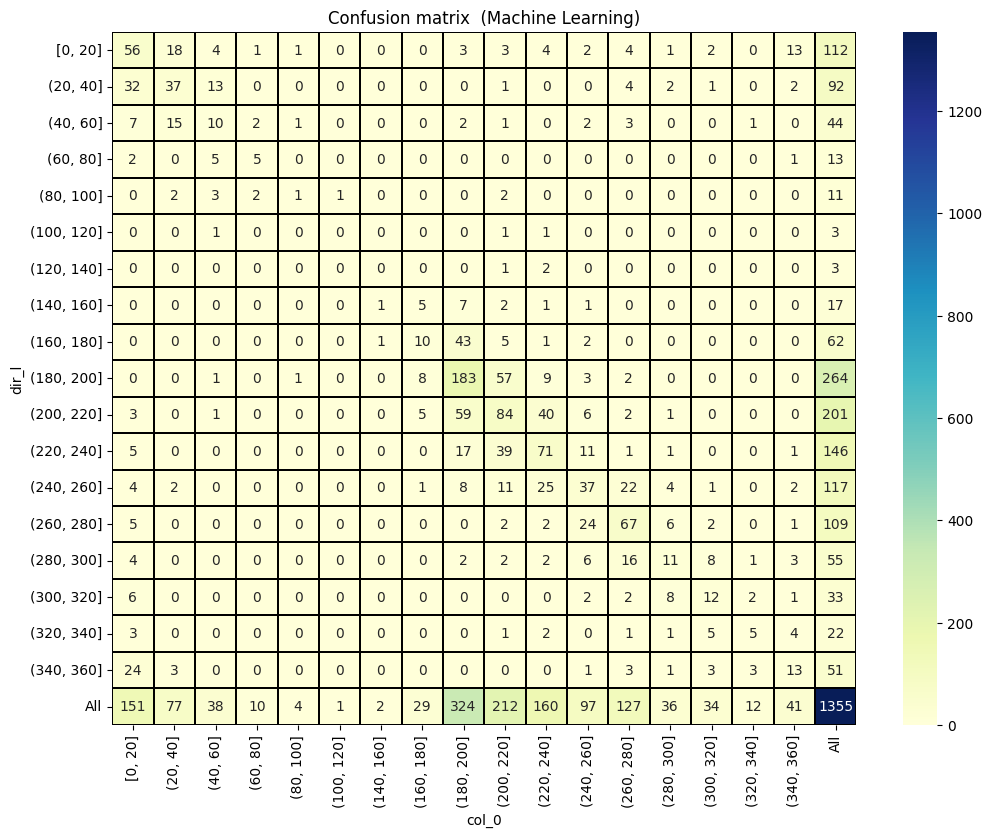

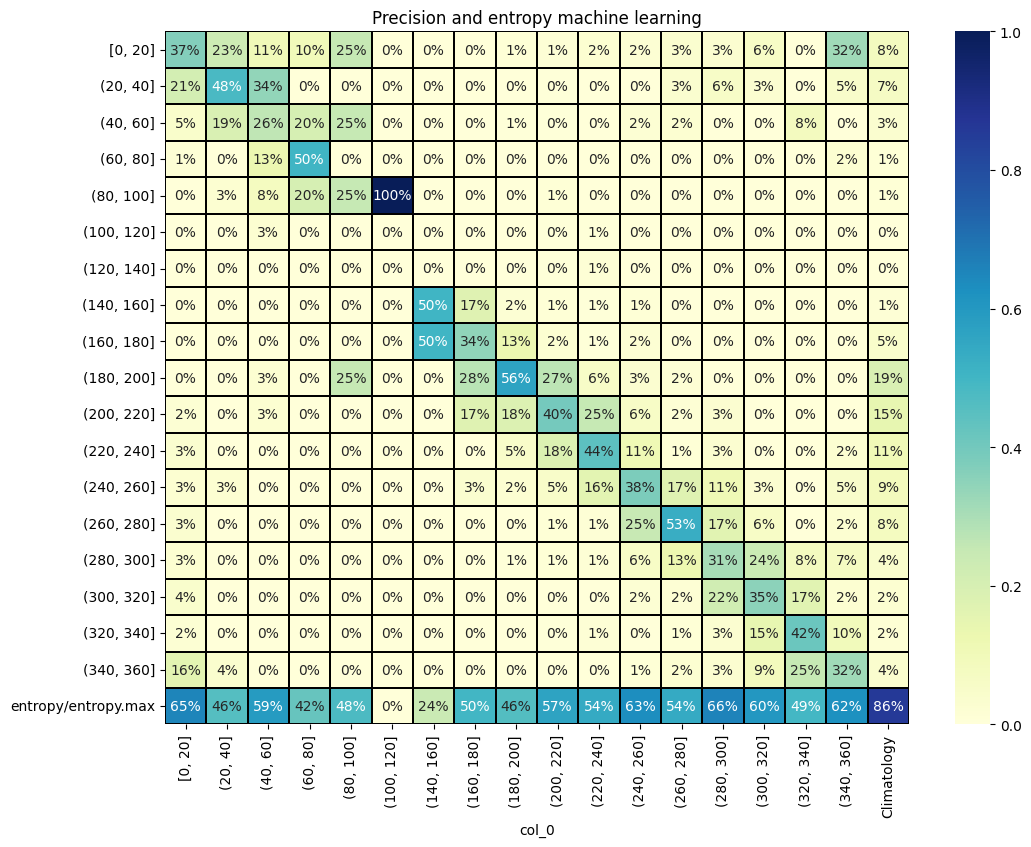

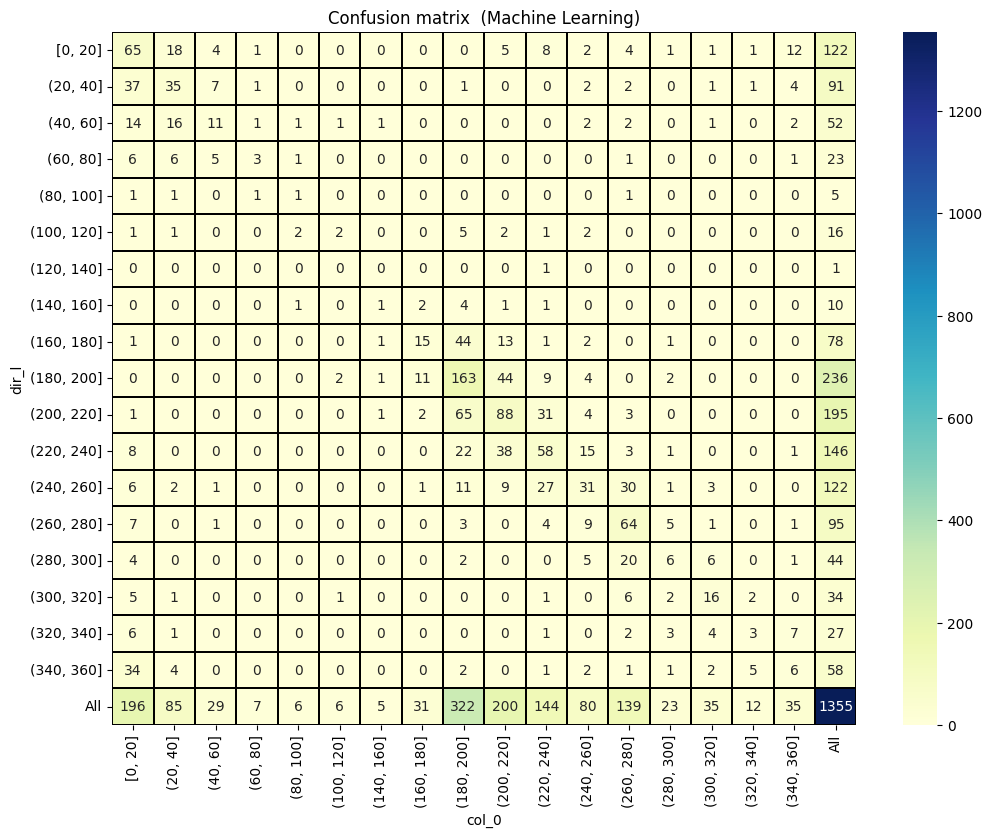

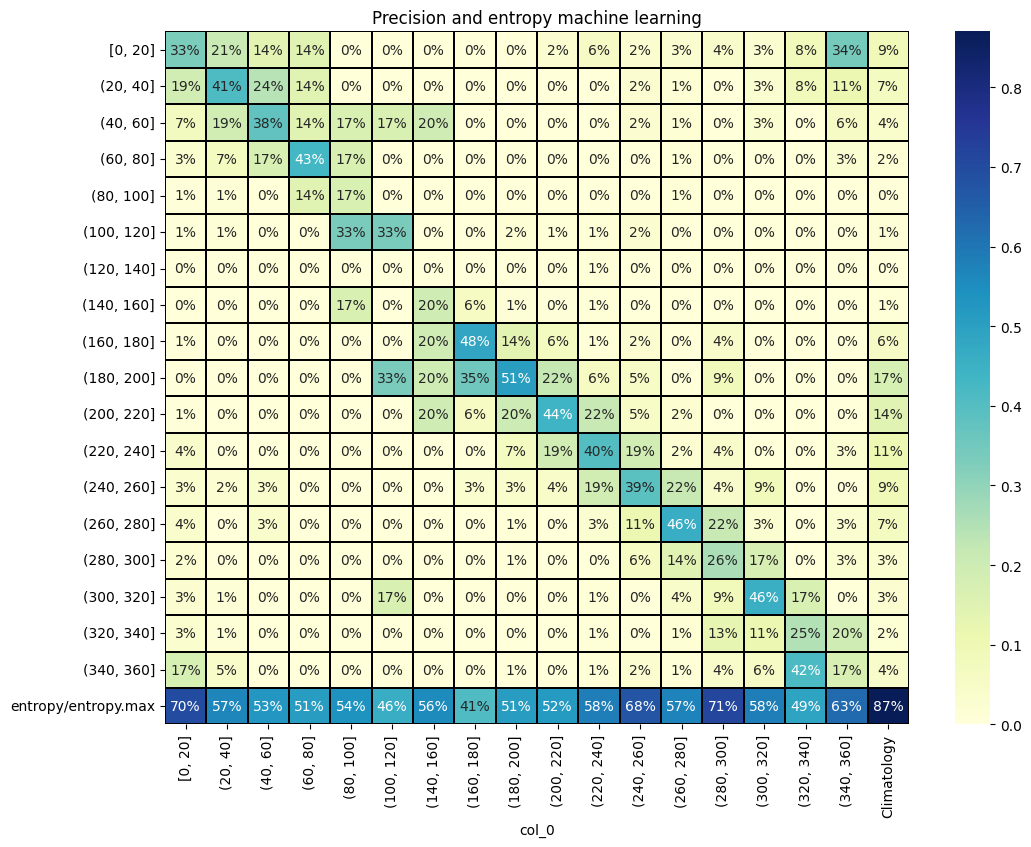

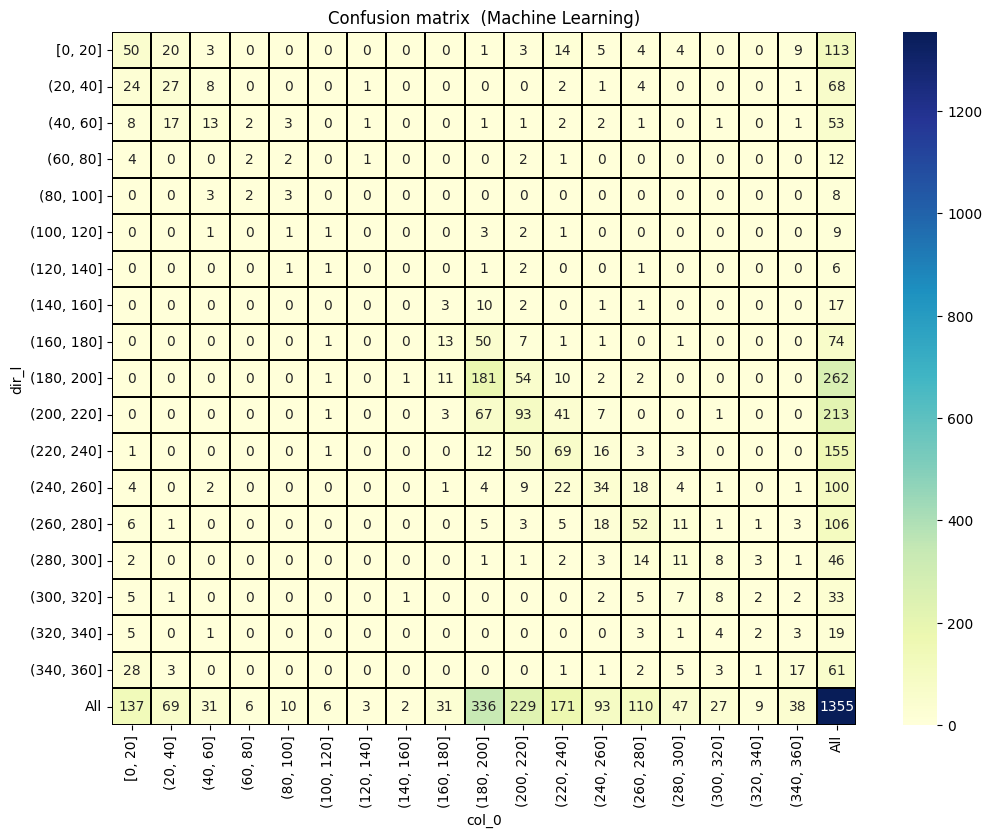

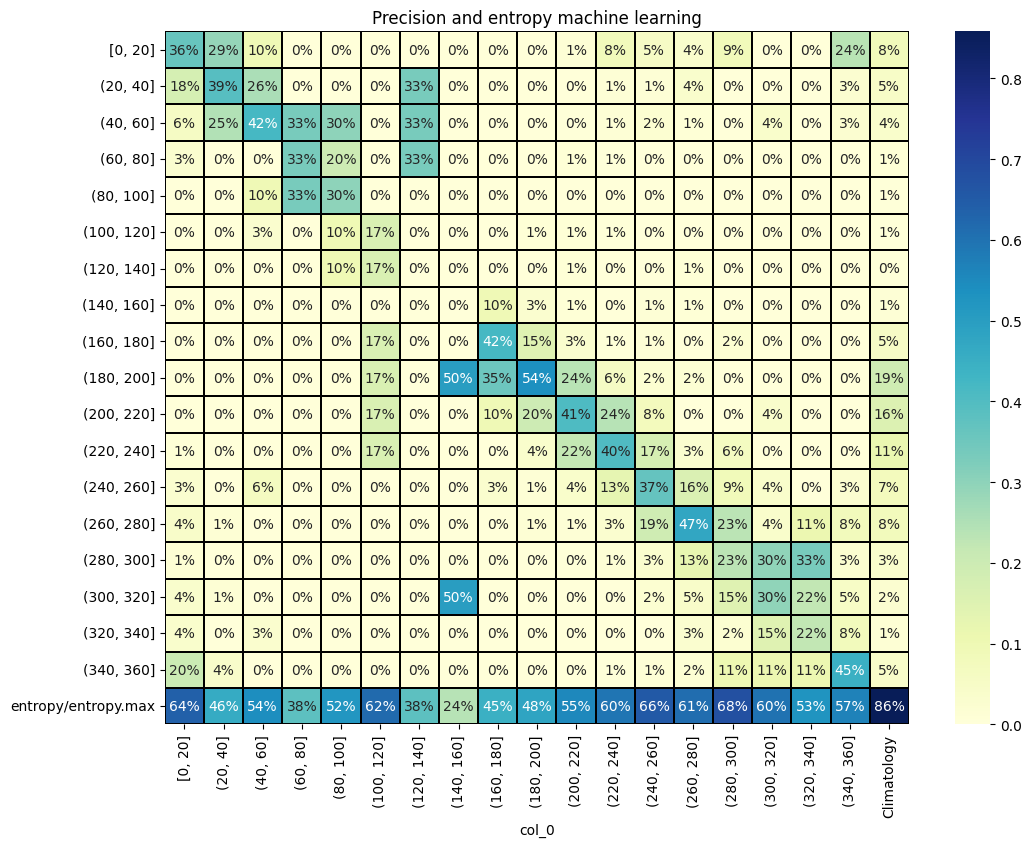

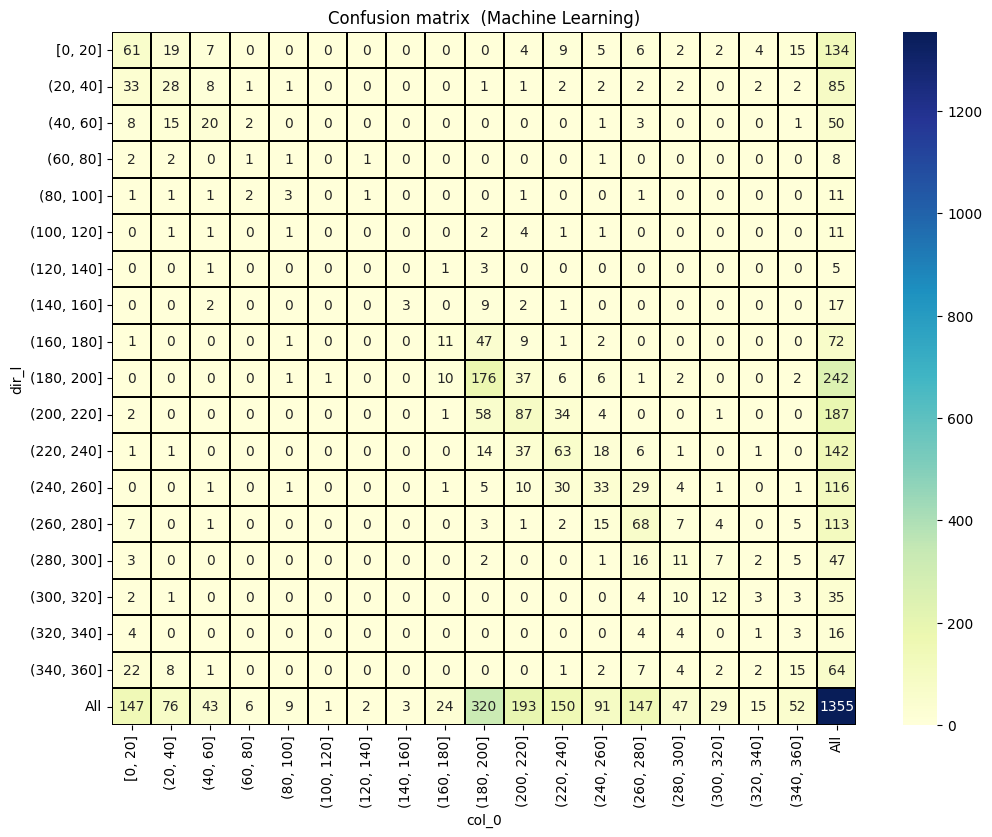

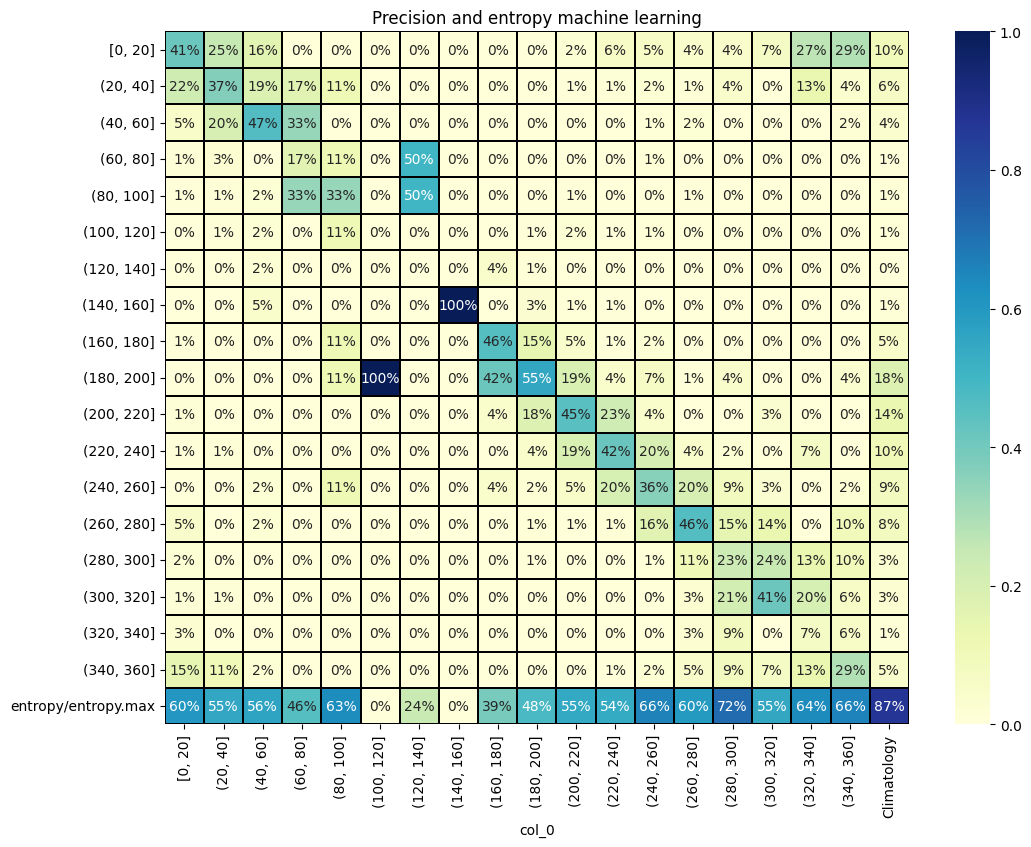

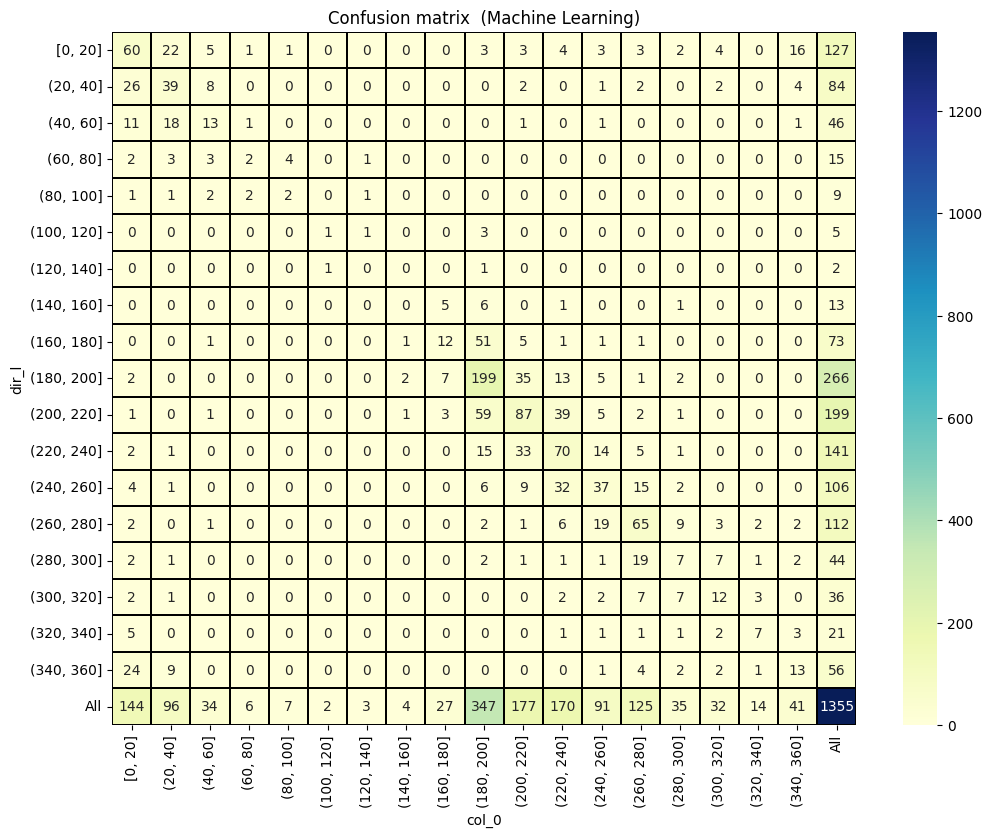

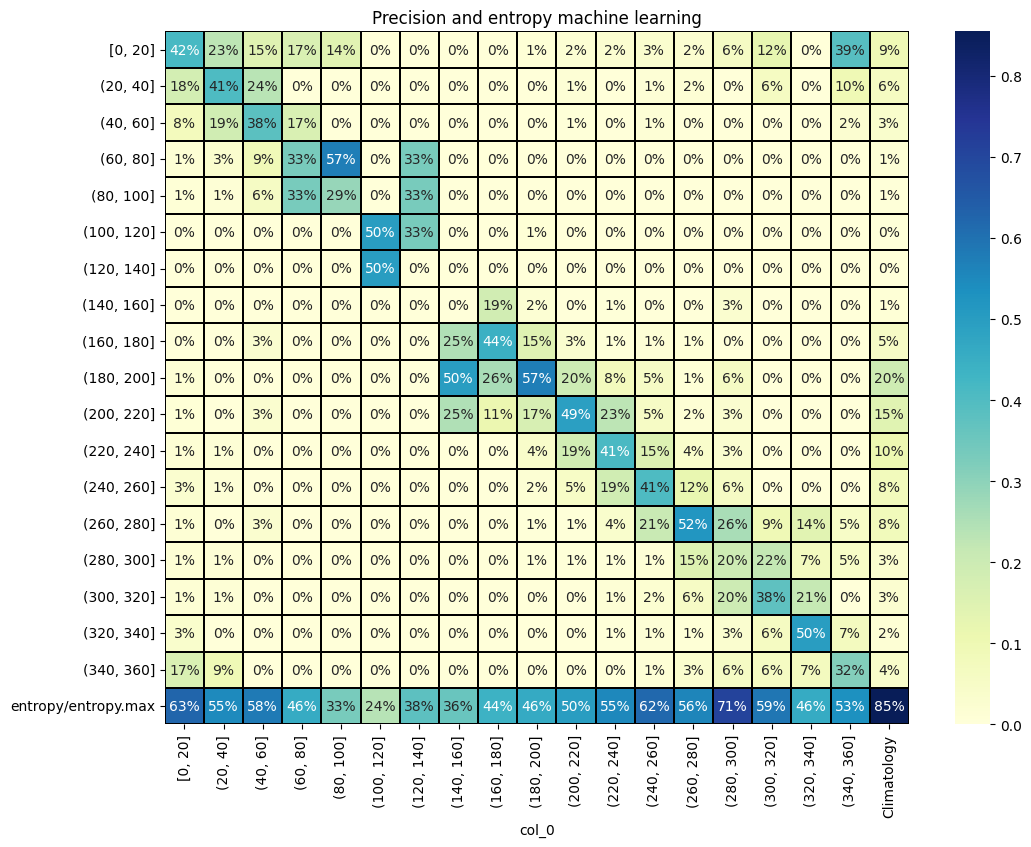

In [ ]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# X and Y
#Y = df_vrb.dir_l
#X = df_vrb.iloc[:,2:]
Y = df_all_h.dir_l
X = df_all_h[['dir0', 'snow_prec0', 'isocero0', 'mod0', 'racha_u0', 'racha_v0',
       'mslp0', 'temp0', 'rh0', 'visibility0', 'lhevapac0', 'lhsublac0',
       'lwflx0', 'prec0', 'swflx0', 'shflxac0', 'cape0', 'cin0', 'cfh0',
       'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1',
       'snow_prec1', 'isocero1', 'mod1', 'racha_u1', 'racha_v1', 'mslp1',
       'temp1', 'rh1', 'visibility1', 'lhevapac1', 'lhsublac1', 'lwflx1',
       'prec1', 'swflx1', 'shflxac1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
       'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501']]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,5):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #ml_model = RandomForestClassifier().fit(X_train,y_train)
  ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  plt.figure(figsize=(12, 9))
  plt.title("Confusion matrix  (Machine Learning)")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  comuns = [element for element in labels+["All"] if element in cm.columns]
  sns.heatmap(cm[comuns],annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');

  plt.figure(figsize=(12, 9))
  plt.title("Precision and entropy machine learning")
  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
  comuns = [element for element in labels+["Climatology"] if element in column_sc.columns]                  
  sns.heatmap(column_sc[comuns],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\n accuracy mean of samples: ",acc_ml)



**T test (1sample) compare machine learning mean accuracy in a sample (n=5) versus meteorological model mean accuracy at point 0 (14%) and at point 1 (14%).
the alternative hypothesis is: the mean of the underlying distribution 
of the sample is greater than the given population mean (popmean). Significance level (alpha) = 0.01**

In [ ]:
from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(acc_ml, popmean=0.15, alternative="greater")


print("\nalpha: ",alpha)

print("\naccuracy list from machine learning test:",acc_ml)
print("\n**** Point 0 ****")
print("\np_value point 0:",p_value0)
if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")

    


alpha:  0.01

accuracy list from machine learning test: [0.45, 0.42, 0.43, 0.44, 0.46]

**** Point 0 ****

p_value point 0: 1.0562090604423494e-06

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0


In [ ]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 4.4%
snow_prec0: 0.0%
isocero0: 1.8%
mod0: 2.4%
racha_u0: 3.0%
racha_v0: 3.7%
mslp0: 1.8%
temp0: 1.9%
rh0: 1.8%
visibility0: 1.8%
lhevapac0: 2.1%
lhsublac0: 1.7%
lwflx0: 2.1%
prec0: 1.1%
swflx0: 1.6%
shflxac0: 2.3%
cape0: 2.0%
cin0: 1.8%
cfh0: 1.2%
cfl0: 1.4%
cfm0: 1.0%
cft0: 1.3%
HGT5000: 1.8%
HGT8500: 1.8%
T5000: 1.8%
T8500: 1.9%
dir1: 4.7%
snow_prec1: 0.0%
isocero1: 1.8%
mod1: 2.4%
racha_u1: 2.9%
racha_v1: 4.4%
mslp1: 1.8%
temp1: 1.9%
rh1: 1.7%
visibility1: 1.9%
lhevapac1: 2.2%
lhsublac1: 1.7%
lwflx1: 2.0%
prec1: 1.1%
swflx1: 1.7%
shflxac1: 2.3%
cape1: 2.0%
cin1: 1.8%
cfh1: 1.2%
cfl1: 1.4%
cfm1: 1.0%
cft1: 1.2%
HGT5001: 1.8%
HGT8501: 1.8%
T5001: 1.8%
T8501: 1.9%


**Add time variables**

In [ ]:
df_all_h["hour"] = df_all_h.index.hour
df_all_h["month"] = df_all_h.index.month
df_all_h["dayofyear"] = df_all_h.index.dayofyear
df_all_h["weekofyear"] = df_all_h.index.isocalendar().week.astype(int)

<ipython-input-22-8e889a7bbc66>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-8e889a7bbc66>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-8e889a7bbc66>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-8e889a7

**Machine learning with time variables**

In [ ]:
df_all_h.iloc[:,2:].columns

Index(['dir0', 'snow_prec0', 'isocero0', 'mod0', 'racha_u0', 'racha_v0',
       'mslp0', 'temp0', 'rh0', 'visibility0', 'lhevapac0', 'lhsublac0',
       'lwflx0', 'prec0', 'swflx0', 'shflxac0', 'cape0', 'cin0', 'cfh0',
       'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1',
       'snow_prec1', 'isocero1', 'mod1', 'racha_u1', 'racha_v1', 'mslp1',
       'temp1', 'rh1', 'visibility1', 'lhevapac1', 'lhsublac1', 'lwflx1',
       'prec1', 'swflx1', 'shflxac1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
       'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501', 'dir0_l', 'hour',
       'month', 'dayofyear', 'weekofyear'],
      dtype='object')

<ipython-input-28-56e8eb3e87ce>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     3.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.000000  0.000000  0.000000    17.000000
(160, 180]     0.350000  0.225806  0.274510    62.000000
(180, 200]     0.568750  0.689394  0.623288   264.000000
(20, 40]       0.472527  0.467391  0.469945    92.000000
(200, 220]     0.425339  0.467662  0.445498   201.000000
(220, 240]     0.417178  0.465753  0.440129   146.000000
(240, 260]     0.397959  0.333333  0.362791   117.000000
(260, 280]     0.512397  0.568807  0.539130   109.000000
(280, 300]     0.393939  0.236364  0.295455    55.000000
(300, 320]     0.458333  0.333333  0.385965    33.000000
(320, 340]     0.250000  0.090909  0.133333    22.000000
(340, 360]     0.428571  0.411765  0.420000    51.000000
(40, 60]       0.407407  0.250000  0.309859    44.000000
(60, 80]       0.428571  0.230769  0.300000    13.000000
(80, 100]      0.250000  0.0909

<ipython-input-28-56e8eb3e87ce>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

              precision    recall  f1-score      support
(100, 120]     0.666667  0.125000  0.210526    16.000000
(120, 140]     0.000000  0.000000  0.000000     0.000000
(140, 160]     0.000000  0.000000  0.000000     7.000000
(160, 180]     0.478261  0.157143  0.236559    70.000000
(180, 200]     0.514286  0.669421  0.581688   242.000000
(20, 40]       0.276190  0.381579  0.320442    76.000000
(200, 220]     0.459916  0.524038  0.489888   208.000000
(220, 240]     0.437500  0.406452  0.421405   155.000000
(240, 260]     0.309524  0.260000  0.282609   100.000000
(260, 280]     0.517483  0.643478  0.573643   115.000000
(280, 300]     0.212121  0.159091  0.181818    44.000000
(300, 320]     0.409091  0.264706  0.321429    34.000000
(320, 340]     0.142857  0.050000  0.074074    20.000000
(340, 360]     0.179487  0.127273  0.148936    55.000000
(40, 60]       0.500000  0.333333  0.400000    45.000000
(60, 80]       0.333333  0.125000  0.181818    16.000000
(80, 100]      0.142857  0.1428

<ipython-input-28-56e8eb3e87ce>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.500000  0.062500  0.111111    16.000000
(120, 140]     0.000000  0.000000  0.000000     4.000000
(140, 160]     0.000000  0.000000  0.000000    17.000000
(160, 180]     0.342857  0.210526  0.260870    57.000000
(180, 200]     0.573099  0.739623  0.645799   265.000000
(20, 40]       0.355556  0.400000  0.376471    80.000000
(200, 220]     0.453608  0.435644  0.444444   202.000000
(220, 240]     0.359756  0.440299  0.395973   134.000000
(240, 260]     0.404255  0.372549  0.387755   102.000000
(260, 280]     0.491667  0.508621  0.500000   116.000000
(280, 300]     0.117647  0.085106  0.098765    47.000000
(300, 320]     0.421053  0.275862  0.333333    29.000000
(320, 340]     0.000000  0.000000  0.000000    23.000000
(340, 360]     0.418605  0.268657  0.327273    67.000000
(40, 60]       0.195122  0.166667  0.179775    48.000000
(60, 80]       0.250000  0.117647  0.160000    17.000000
(80, 100]      0.250000  0.1111

<ipython-input-28-56e8eb3e87ce>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     1.000000  0.090909  0.166667    11.000000
(120, 140]     0.000000  0.000000  0.000000     4.000000
(140, 160]     0.400000  0.200000  0.266667    10.000000
(160, 180]     0.406250  0.194030  0.262626    67.000000
(180, 200]     0.561056  0.699588  0.622711   243.000000
(20, 40]       0.371134  0.363636  0.367347    99.000000
(200, 220]     0.435780  0.502646  0.466830   189.000000
(220, 240]     0.412162  0.401316  0.406667   152.000000
(240, 260]     0.311111  0.280000  0.294737   100.000000
(260, 280]     0.480000  0.521739  0.500000   115.000000
(280, 300]     0.258065  0.173913  0.207792    46.000000
(300, 320]     0.391304  0.281250  0.327273    32.000000
(320, 340]     0.250000  0.130435  0.171429    23.000000
(340, 360]     0.240741  0.240741  0.240741    54.000000
(40, 60]       0.500000  0.228070  0.313253    57.000000
(60, 80]       0.000000  0.000000  0.000000     6.0

<ipython-input-28-56e8eb3e87ce>:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.142857  0.125000  0.133333     8.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.000000  0.000000  0.000000    14.000000
(160, 180]     0.580645  0.227848  0.327273    79.000000
(180, 200]     0.572727  0.732558  0.642857   258.000000
(20, 40]       0.407895  0.340659  0.371257    91.000000
(200, 220]     0.425926  0.450980  0.438095   204.000000
(220, 240]     0.443787  0.513699  0.476190   146.000000
(240, 260]     0.454545  0.324074  0.378378   108.000000
(260, 280]     0.551724  0.673684  0.606635    95.000000
(280, 300]     0.242424  0.195122  0.216216    41.000000
(300, 320]     0.470588  0.228571  0.307692    35.000000
(320, 340]     0.200000  0.142857  0.166667    21.000000
(340, 360]     0.351351  0.250000  0.292135    52.000000
(40, 60]       0.375000  0.312500  0.340909    48.000000
(60, 80]       0.111111  0.062500  0.080000    16.000000
(80, 100]      0.400000  0.2000

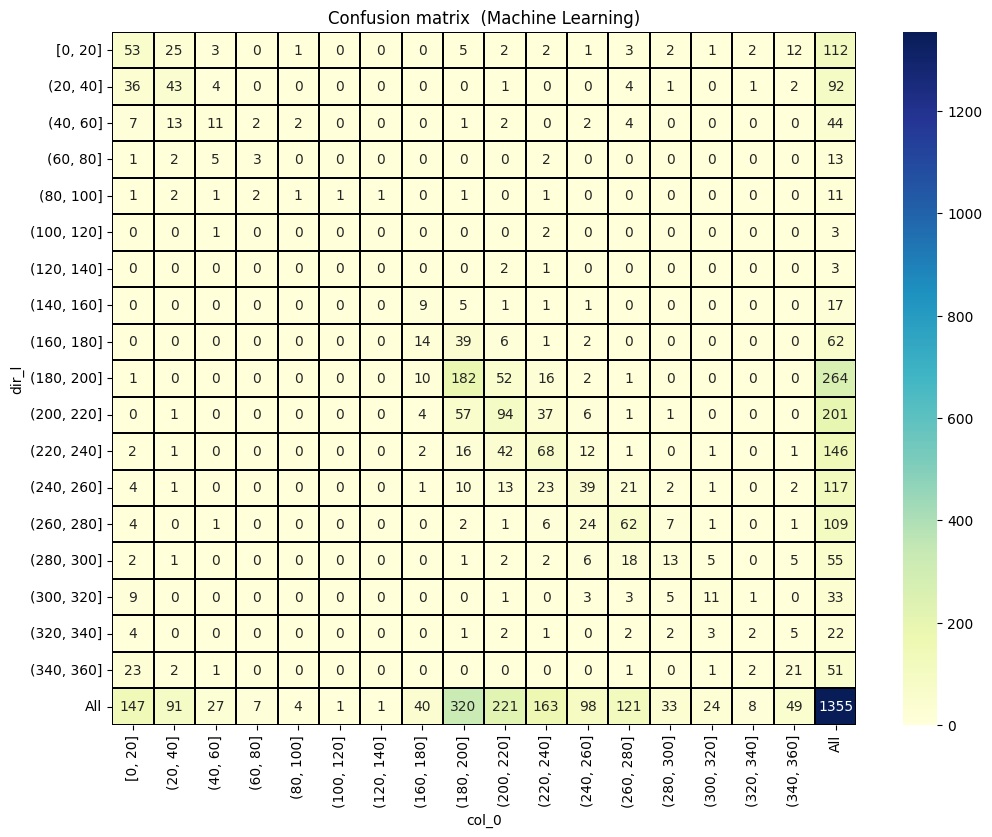

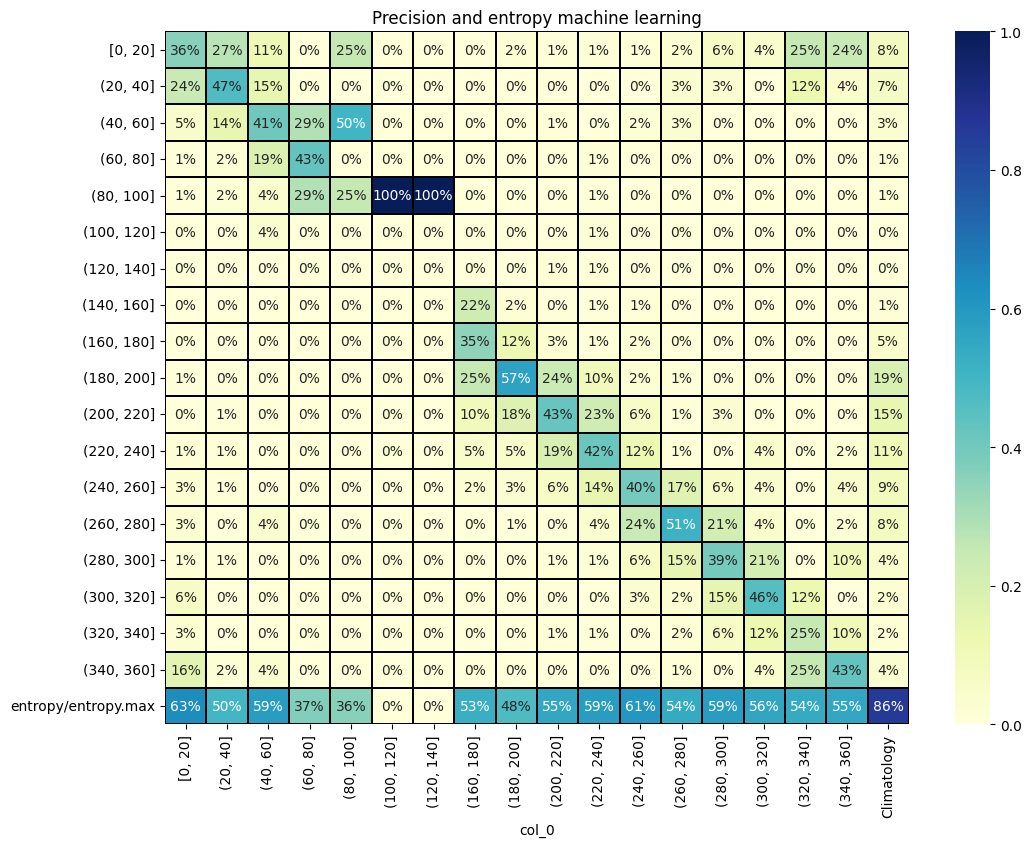

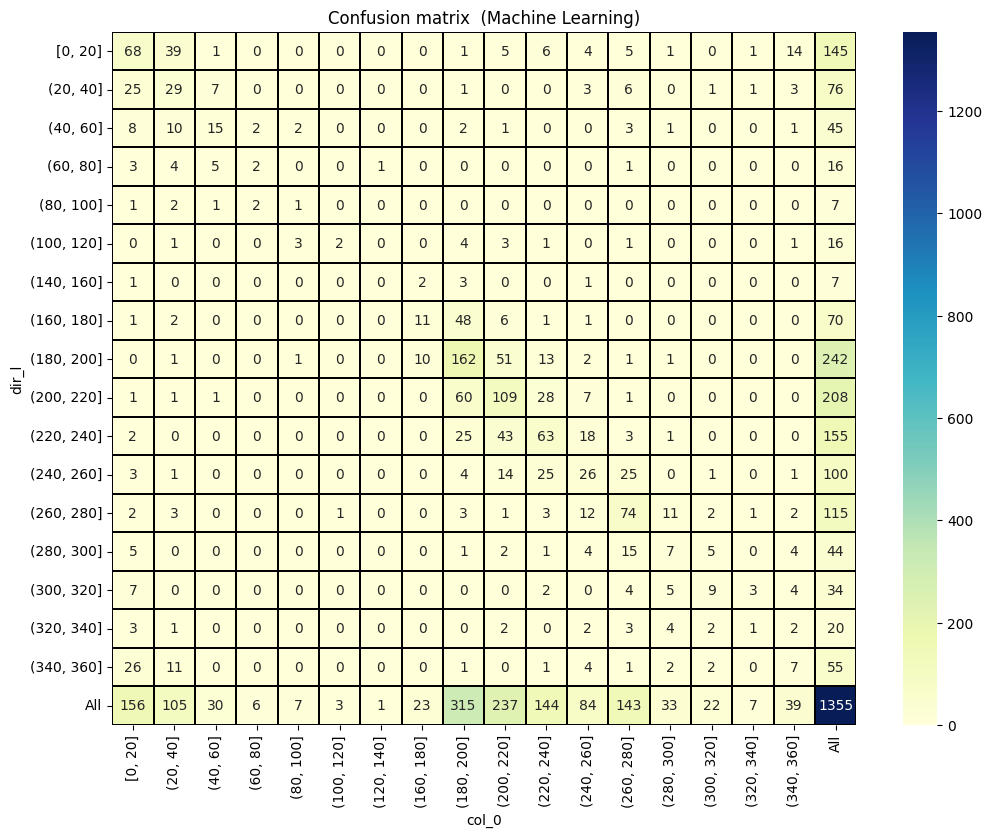

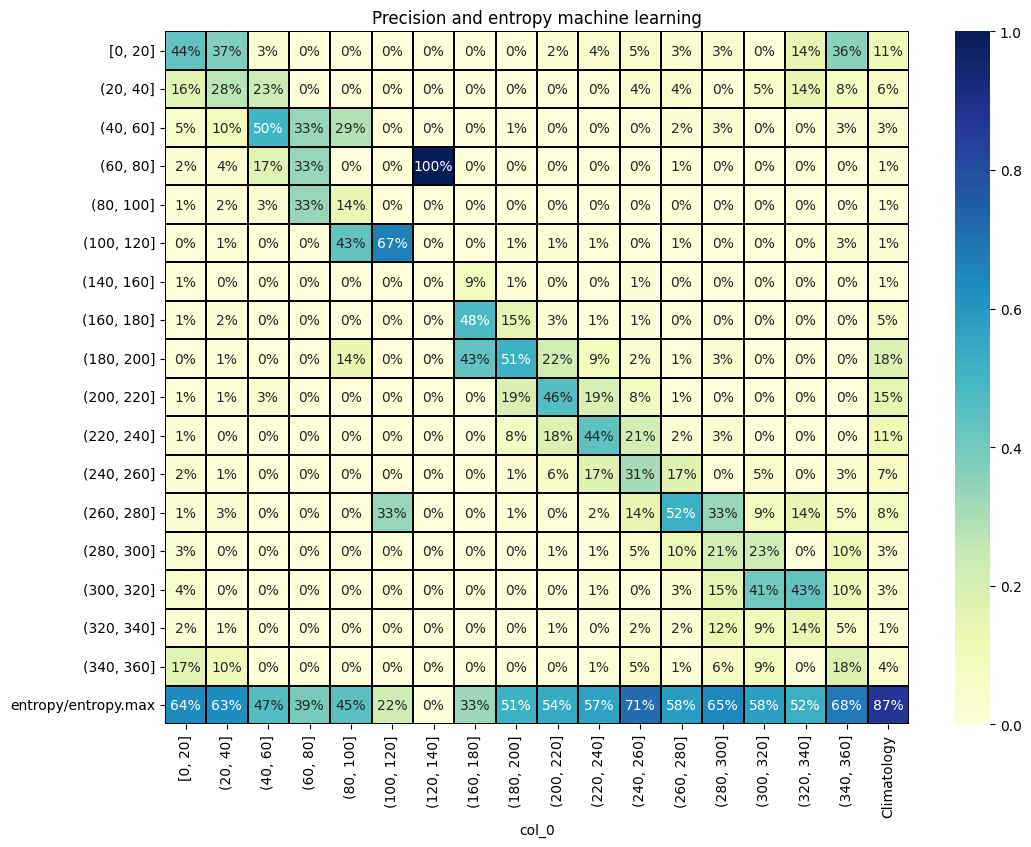

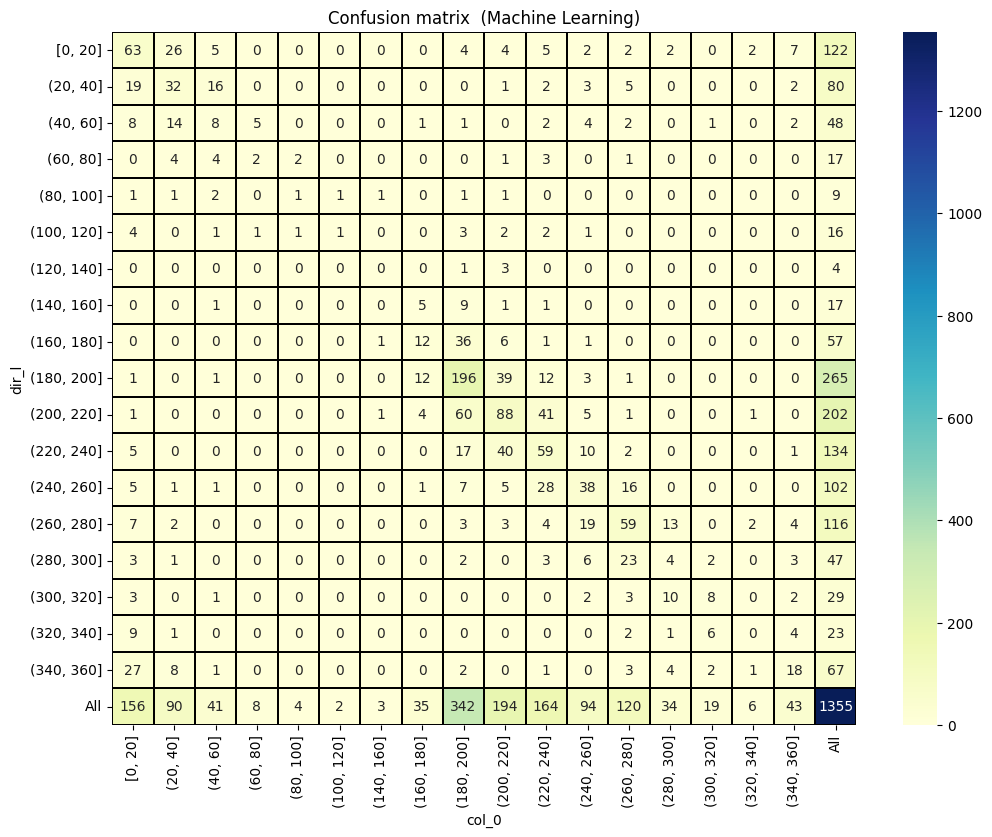

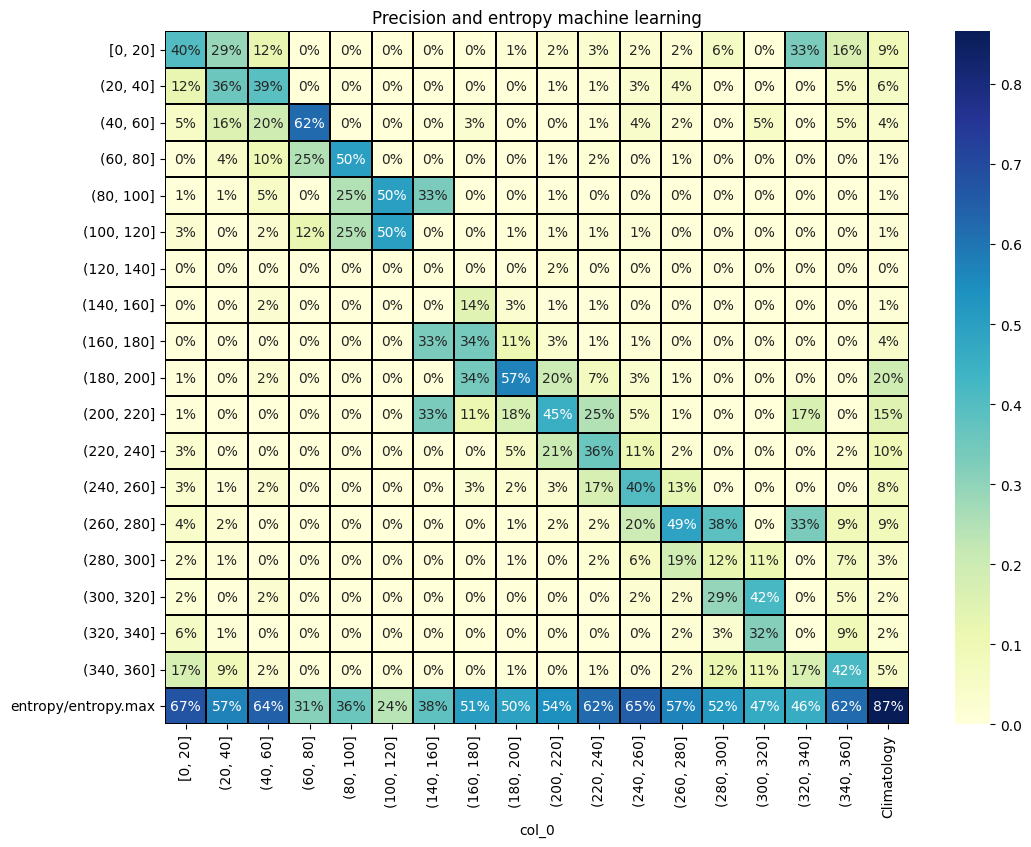

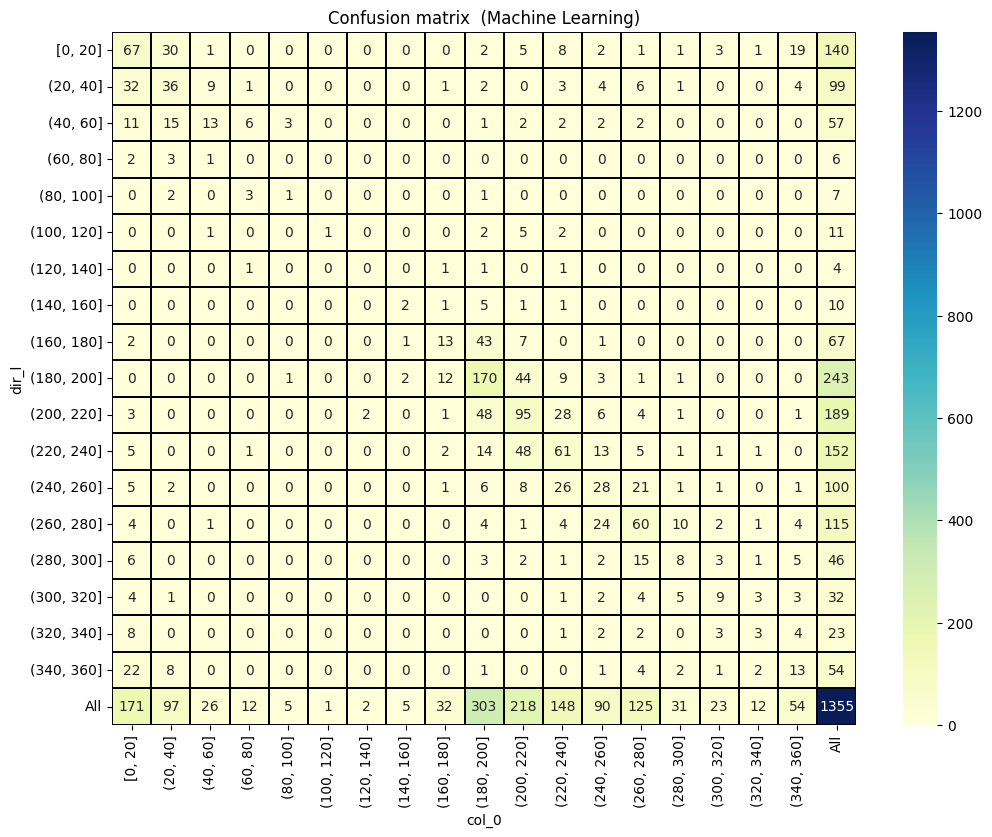

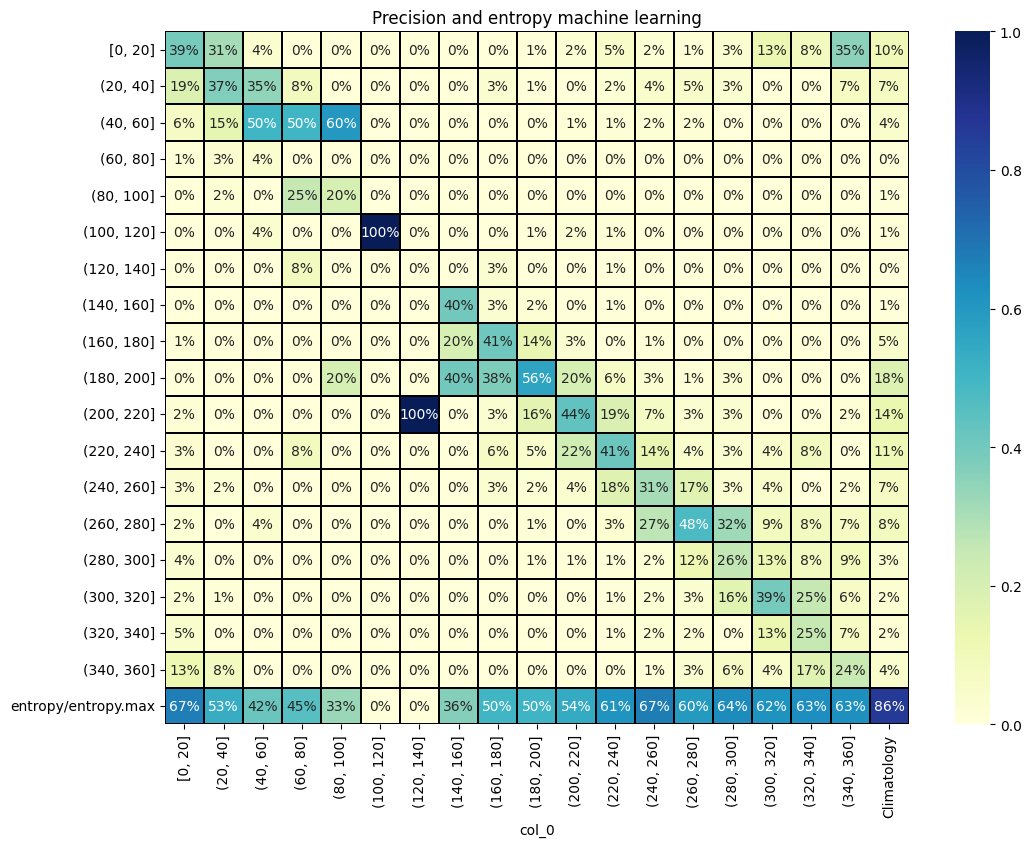

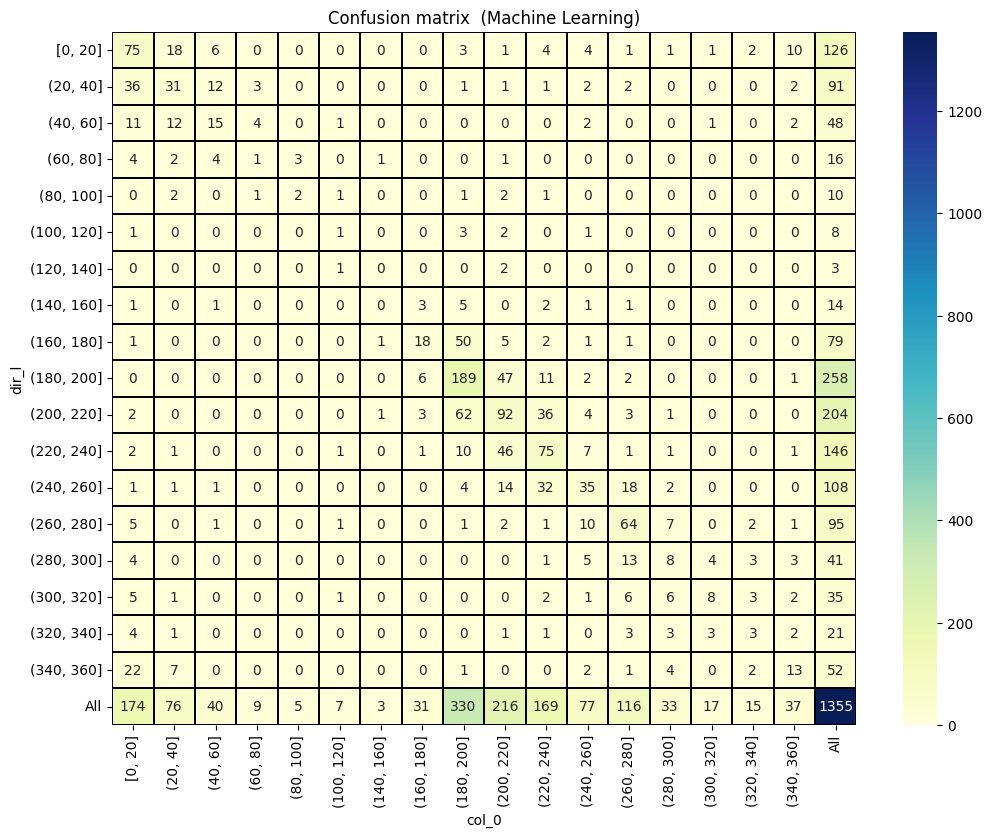

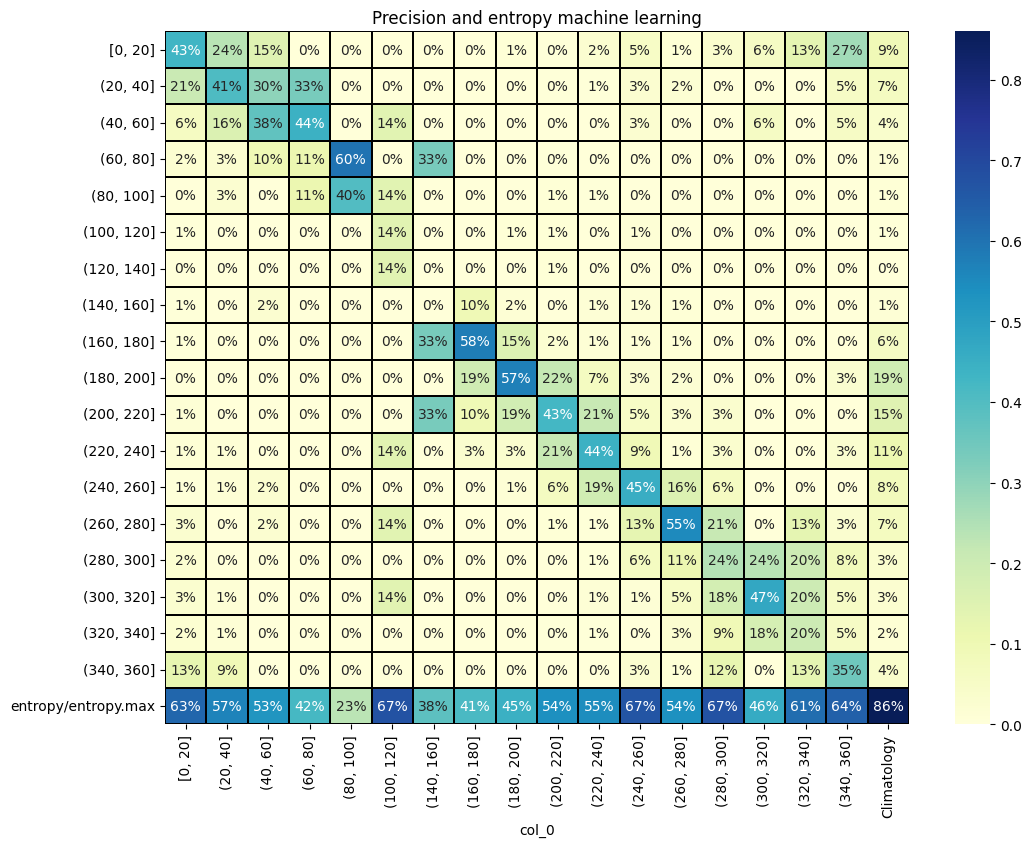

In [ ]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# X and Y
Y = df_all_h.dir_l
X = df_all_h[['dir0', 'snow_prec0', 'isocero0', 'mod0', 'racha_u0', 'racha_v0',
       'mslp0', 'temp0', 'rh0', 'visibility0', 'lhevapac0', 'lhsublac0',
       'lwflx0', 'prec0', 'swflx0', 'shflxac0', 'cape0', 'cin0', 'cfh0',
       'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1',
       'snow_prec1', 'isocero1', 'mod1', 'racha_u1', 'racha_v1', 'mslp1',
       'temp1', 'rh1', 'visibility1', 'lhevapac1', 'lhsublac1', 'lwflx1',
       'prec1', 'swflx1', 'shflxac1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
       'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501', 'hour','month', 'dayofyear', 'weekofyear']]

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

# mean accuracy machine learning sample after add time variables
acc_ml_a = []

# loop random
for t in range (0,5):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_a.append(round(accuracy_score(y_test, y_pred),2))

  
  #Confusion matrix
  plt.figure(figsize=(12, 9))
  plt.title("Confusion matrix  (Machine Learning)")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  comuns = [element for element in labels+["All"] if element in cm.columns]
  sns.heatmap(cm[comuns],annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');

  plt.figure(figsize=(12, 9))
  plt.title("Precision and entropy machine learning")
  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
  comuns = [element for element in labels+["Climatology"] if element in column_sc.columns]                  
  sns.heatmap(column_sc[comuns],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');

 

  #quality report
  print("\n Quality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nAccuracy mean of samples trained with time variables: ",acc_ml_a)

In [ ]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 3.0%
snow_prec0: 0.0%
isocero0: 2.1%
mod0: 3.0%
racha_u0: 3.0%
racha_v0: 3.1%
mslp0: 2.0%
temp0: 2.0%
rh0: 1.1%
visibility0: 2.4%
lhevapac0: 2.6%
lhsublac0: 3.6%
lwflx0: 2.5%
prec0: 0.8%
swflx0: 1.3%
shflxac0: 2.7%
cape0: 2.6%
cin0: 2.4%
cfh0: 0.8%
cfl0: 0.6%
cfm0: 0.6%
cft0: 0.8%
HGT5000: 1.9%
HGT8500: 2.1%
T5000: 2.3%
T8500: 2.0%
dir1: 2.9%
snow_prec1: 0.0%
isocero1: 1.7%
mod1: 3.3%
racha_u1: 3.3%
racha_v1: 3.5%
mslp1: 1.2%
temp1: 2.0%
rh1: 1.0%
visibility1: 2.3%
lhevapac1: 2.2%
lhsublac1: 1.2%
lwflx1: 2.6%
prec1: 0.8%
swflx1: 1.1%
shflxac1: 2.9%
cape1: 2.7%
cin1: 2.4%
cfh1: 0.7%
cfl1: 0.5%
cfm1: 0.5%
cft1: 0.6%
HGT5001: 0.8%
HGT8501: 0.9%
T5001: 1.3%
T8501: 1.3%
hour: 1.7%
month: 0.2%
dayofyear: 2.2%
weekofyear: 0.5%


**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [ ]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_a, alternative="less")

print("\nmeans without time variables:", acc_ml)
print("\nmeans with time variables:", acc_ml_a)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the mean of the sample without time variables inputs is less than the mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables ")




means without time variables: [0.45, 0.42, 0.43, 0.44, 0.46]

means with time variables: [0.46, 0.43, 0.43, 0.43, 0.46]

alpha:  0.01

p_value point:  0.31065414751874854

we are accepting null hypothesis:  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables 


**Machine learning with output vrb**

<ipython-input-31-c7b8d3b18c99>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score     support
(100, 120]     0.000000  0.000000  0.000000     4.00000
(120, 140]     0.000000  0.000000  0.000000     4.00000
(140, 160]     0.000000  0.000000  0.000000    11.00000
(160, 180]     0.500000  0.185714  0.270833    70.00000
(180, 200]     0.493902  0.672199  0.569420   241.00000
(20, 40]       0.363636  0.296296  0.326531    81.00000
(200, 220]     0.451087  0.382488  0.413965   217.00000
(220, 240]     0.391304  0.357616  0.373702   151.00000
(240, 260]     0.333333  0.192982  0.244444   114.00000
(260, 280]     0.471698  0.471698  0.471698   106.00000
(280, 300]     0.200000  0.104167  0.136986    48.00000
(300, 320]     0.562500  0.281250  0.375000    32.00000
(320, 340]     0.000000  0.000000  0.000000    29.00000
(340, 360]     0.333333  0.177419  0.231579    62.00000
(40, 60]       0.419355  0.265306  0.325000    49.00000
(60, 80]       0.090909  0.125000  0.105263     8.00000
(80, 100]      0.666667  0.285714  0.400000     

<ipython-input-31-c7b8d3b18c99>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     7.000000
(120, 140]     0.000000  0.000000  0.000000     6.000000
(140, 160]     0.200000  0.111111  0.142857     9.000000
(160, 180]     0.516129  0.225352  0.313725    71.000000
(180, 200]     0.549849  0.664234  0.601653   274.000000
(20, 40]       0.388060  0.279570  0.325000    93.000000
(200, 220]     0.381188  0.411765  0.395887   187.000000
(220, 240]     0.424242  0.378378  0.400000   148.000000
(240, 260]     0.405797  0.274510  0.327485   102.000000
(260, 280]     0.442478  0.471698  0.456621   106.000000
(280, 300]     0.400000  0.175439  0.243902    57.000000
(300, 320]     0.550000  0.268293  0.360656    41.000000
(320, 340]     0.500000  0.074074  0.129032    27.000000
(340, 360]     0.393939  0.240741  0.298851    54.000000
(40, 60]       0.166667  0.097561  0.123077    41.000000
(60, 80]       0.500000  0.066667  0.117647    15.000000
(80, 100]      0.666667  0.2222

<ipython-input-31-c7b8d3b18c99>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     7.000000
(120, 140]     0.000000  0.000000  0.000000     7.000000
(140, 160]     0.666667  0.181818  0.285714    11.000000
(160, 180]     0.360000  0.134328  0.195652    67.000000
(180, 200]     0.554517  0.689922  0.614853   258.000000
(20, 40]       0.365079  0.298701  0.328571    77.000000
(200, 220]     0.469274  0.424242  0.445623   198.000000
(220, 240]     0.456693  0.420290  0.437736   138.000000
(240, 260]     0.417910  0.259259  0.320000   108.000000
(260, 280]     0.500000  0.485714  0.492754   105.000000
(280, 300]     0.130435  0.078947  0.098361    38.000000
(300, 320]     0.350000  0.179487  0.237288    39.000000
(320, 340]     0.000000  0.000000  0.000000    23.000000
(340, 360]     0.361111  0.191176  0.250000    68.000000
(40, 60]       0.227273  0.098039  0.136986    51.000000
(60, 80]       0.000000  0.000000  0.000000    13.000000
(80, 100]      0.500000  0.1111

<ipython-input-31-c7b8d3b18c99>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000    11.000000
(120, 140]     0.000000  0.000000  0.000000     2.000000
(140, 160]     0.500000  0.166667  0.250000    12.000000
(160, 180]     0.321429  0.163636  0.216867    55.000000
(180, 200]     0.601852  0.667808  0.633117   292.000000
(20, 40]       0.446429  0.294118  0.354610    85.000000
(200, 220]     0.410000  0.398058  0.403941   206.000000
(220, 240]     0.472868  0.367470  0.413559   166.000000
(240, 260]     0.439024  0.346154  0.387097   104.000000
(260, 280]     0.504950  0.439655  0.470046   116.000000
(280, 300]     0.200000  0.066667  0.100000    45.000000
(300, 320]     0.185185  0.166667  0.175439    30.000000
(320, 340]     0.200000  0.047619  0.076923    21.000000
(340, 360]     0.333333  0.285714  0.307692    42.000000
(40, 60]       0.434783  0.243902  0.312500    41.000000
(60, 80]       0.750000  0.187500  0.300000    16.000000
(80, 100]      0.250000  0.1000

<ipython-input-31-c7b8d3b18c99>:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




 Quality report (Machine Learning)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     9.000000
(120, 140]     0.000000  0.000000  0.000000     0.000000
(140, 160]     0.000000  0.000000  0.000000    15.000000
(160, 180]     0.480000  0.307692  0.375000    78.000000
(180, 200]     0.509740  0.656904  0.574040   239.000000
(20, 40]       0.270588  0.298701  0.283951    77.000000
(200, 220]     0.414508  0.396040  0.405063   202.000000
(220, 240]     0.402685  0.413793  0.408163   145.000000
(240, 260]     0.344262  0.221053  0.269231    95.000000
(260, 280]     0.554545  0.488000  0.519149   125.000000
(280, 300]     0.250000  0.136364  0.176471    44.000000
(300, 320]     0.470588  0.242424  0.320000    33.000000
(320, 340]     0.250000  0.043478  0.074074    23.000000
(340, 360]     0.424242  0.197183  0.269231    71.000000
(40, 60]       0.185185  0.119048  0.144928    42.000000
(60, 80]       0.666667  0.133333  0.222222    15.000000
(80, 100]      0.000000  0.0000

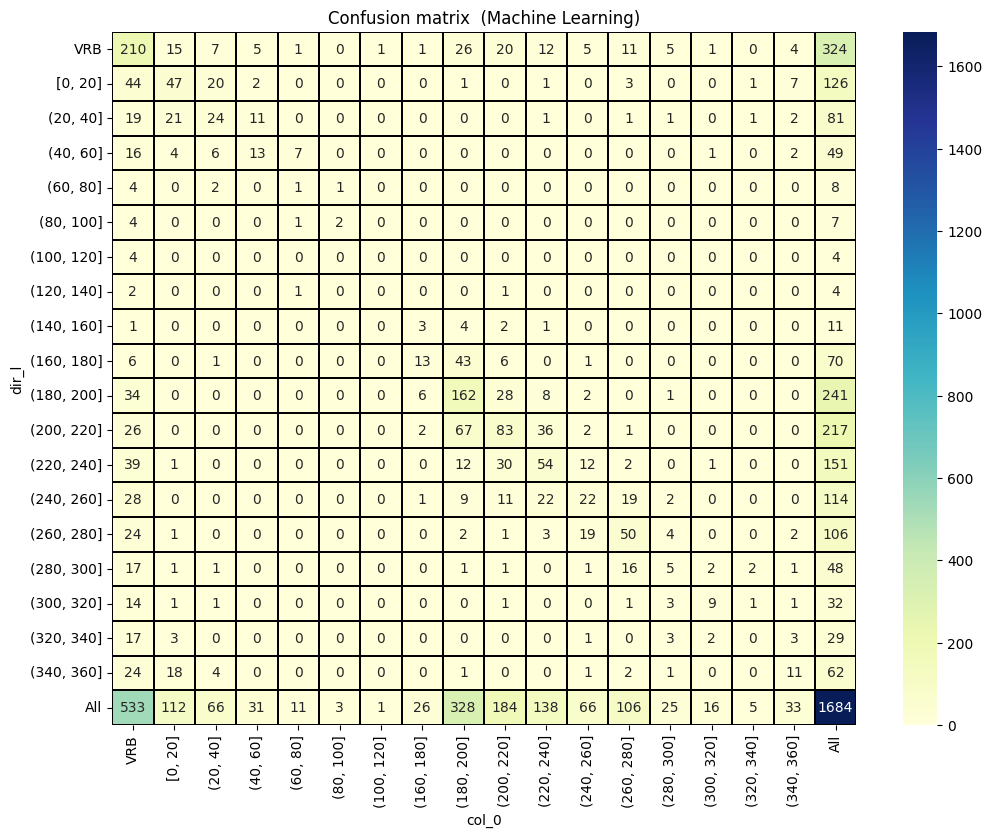

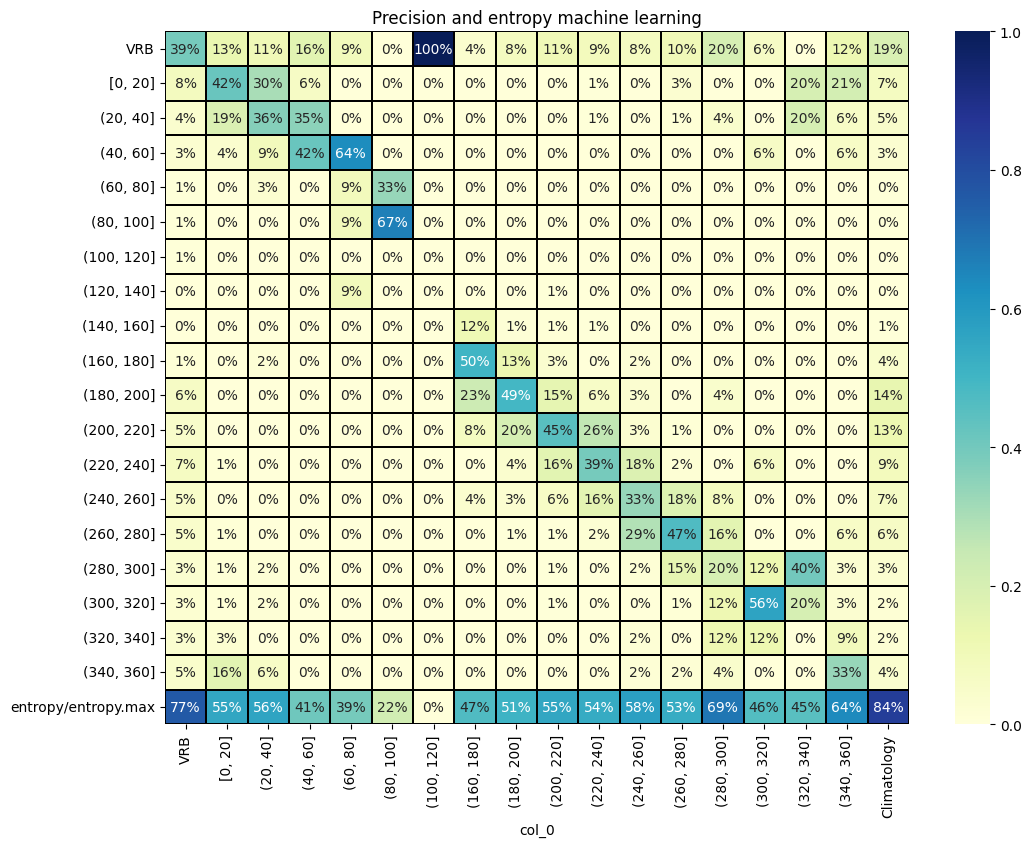

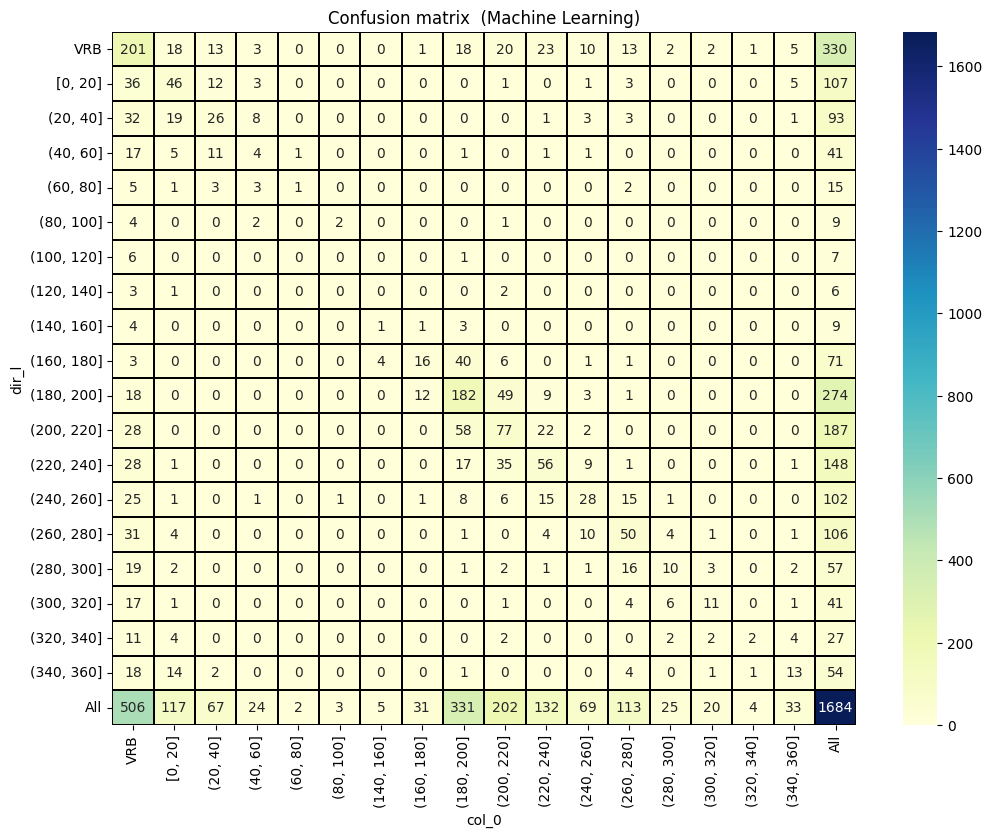

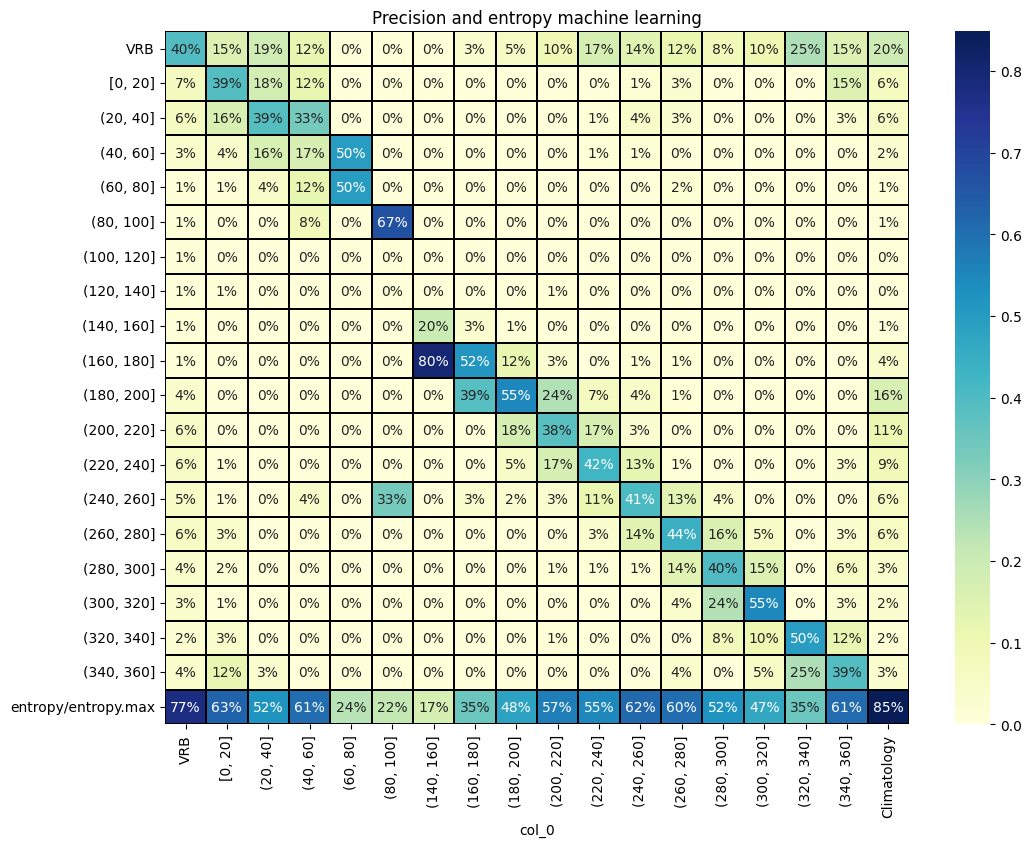

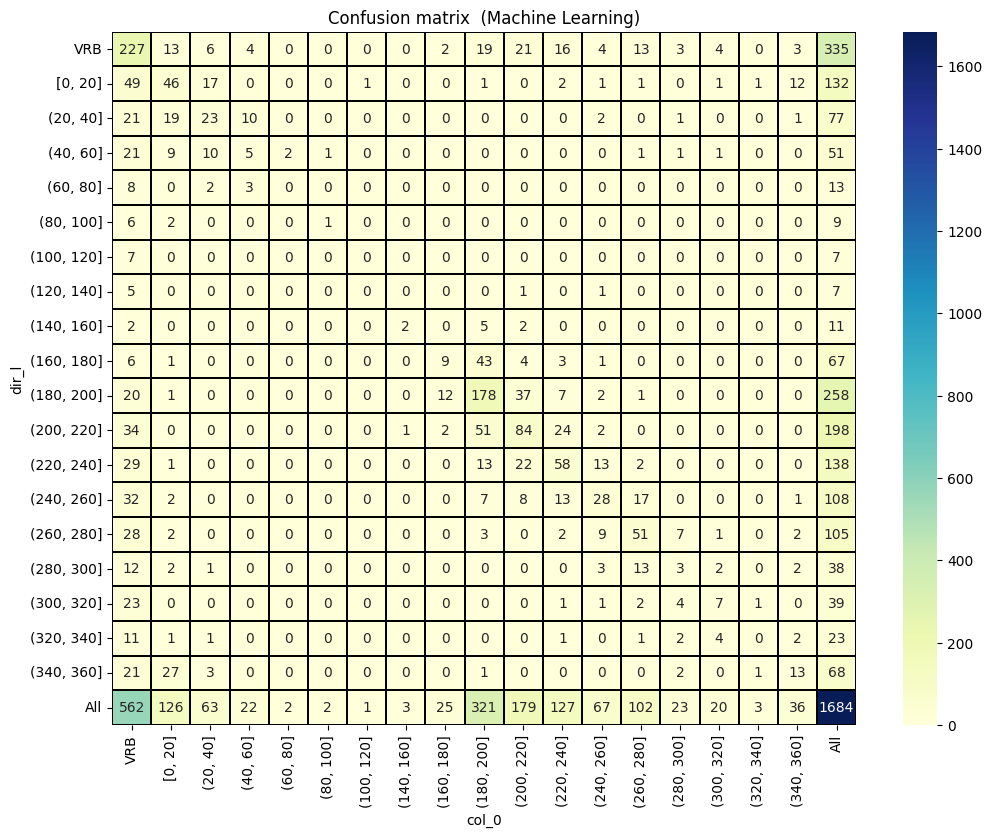

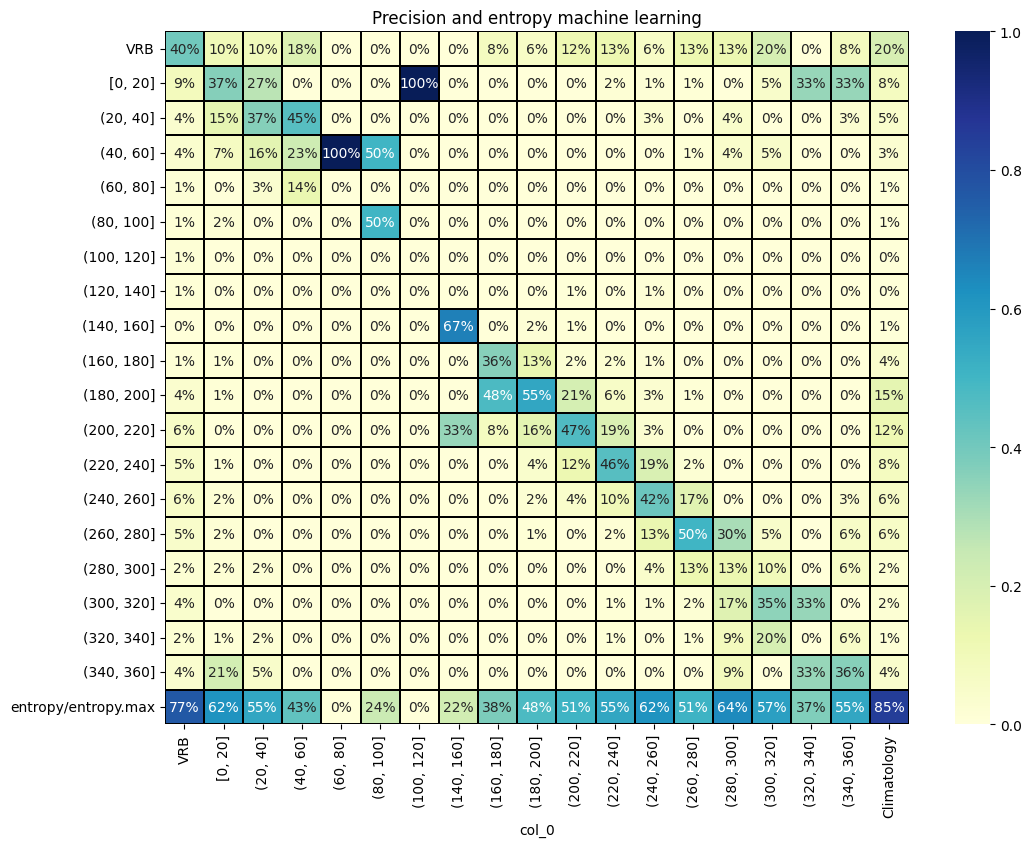

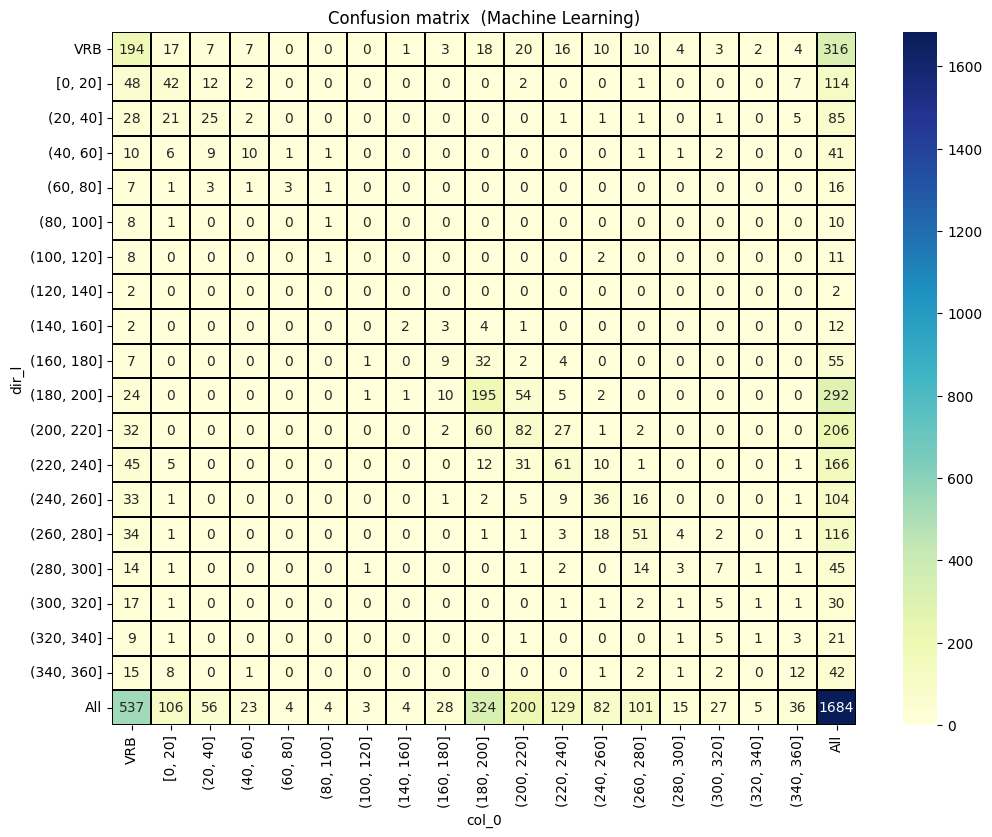

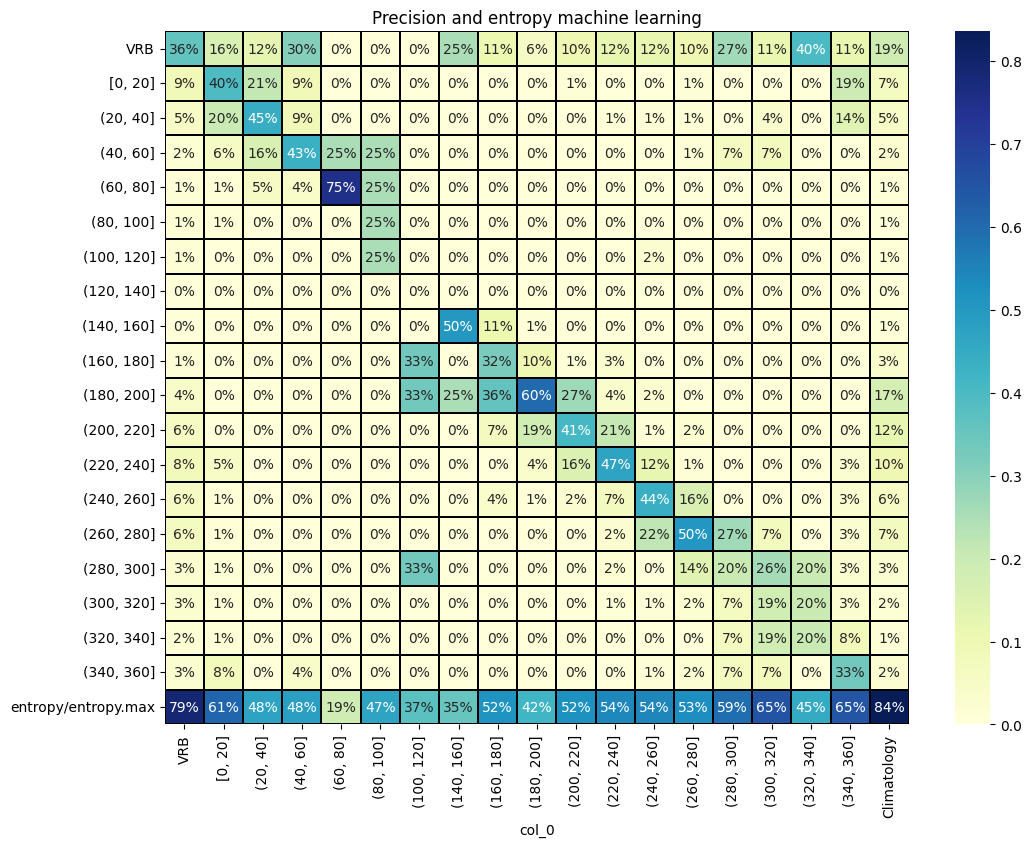

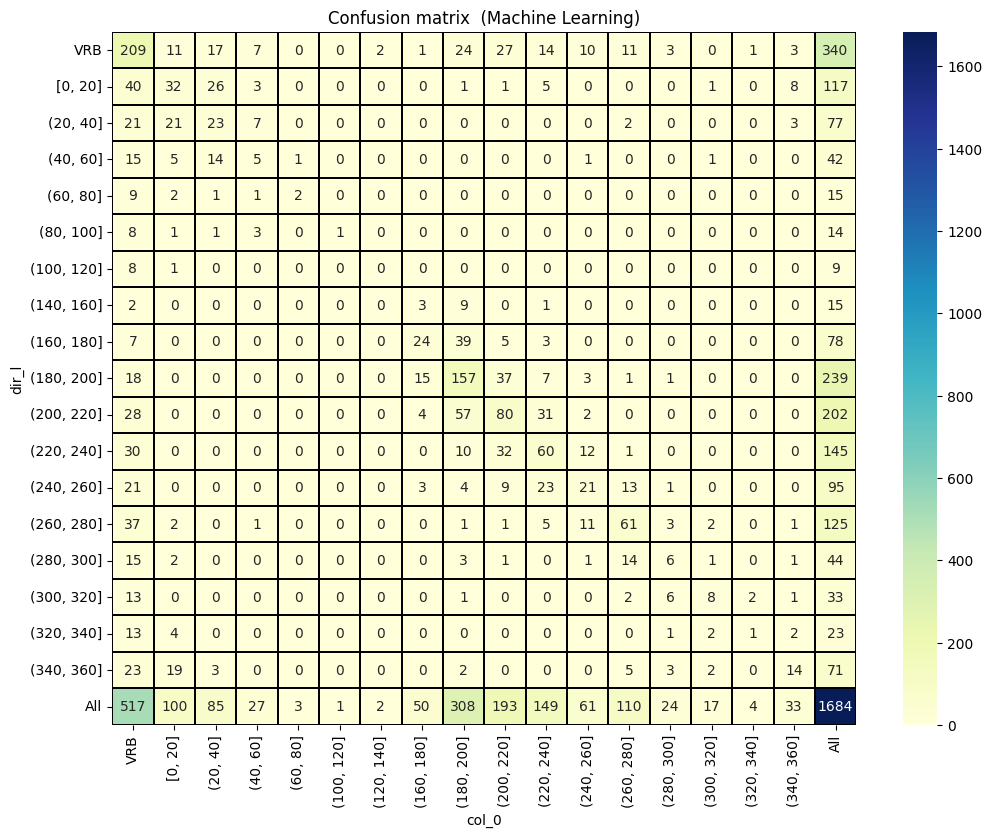

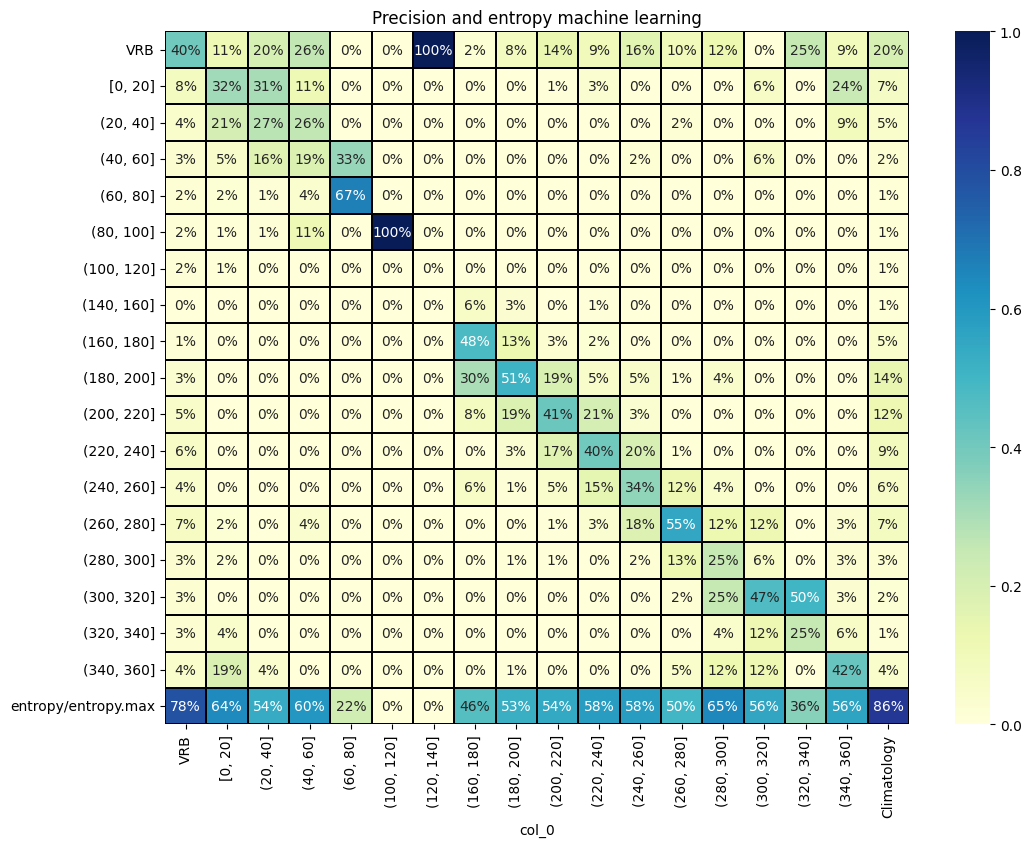

In [ ]:
# X and Y
Y = df_vrb.dir_l
X = df_vrb[['dir0', 'snow_prec0', 'isocero0', 'mod0', 'racha_u0', 'racha_v0',
       'mslp0', 'temp0', 'rh0', 'visibility0', 'lhevapac0', 'lhsublac0',
       'lwflx0', 'prec0', 'swflx0', 'shflxac0', 'cape0', 'cin0', 'cfh0',
       'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1',
       'snow_prec1', 'isocero1', 'mod1', 'racha_u1', 'racha_v1', 'mslp1',
       'temp1', 'rh1', 'visibility1', 'lhevapac1', 'lhsublac1', 'lwflx1',
       'prec1', 'swflx1', 'shflxac1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
       'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501', 'hour','month', 'dayofyear', 'weekofyear']]

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

# mean accuracy machine learning sample after add time variables
acc_ml_a = []

# loop random
for t in range (0,5):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_a.append(round(accuracy_score(y_test, y_pred),2))

  
  #Confusion matrix
  plt.figure(figsize=(12, 9))
  plt.title("Confusion matrix  (Machine Learning)")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  comuns = [element for element in labels+["All"] if element in cm.columns]
  sns.heatmap(cm[comuns],annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');

  plt.figure(figsize=(12, 9))
  plt.title("Precision and entropy machine learning")
  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
  comuns = [element for element in labels+["Climatology"] if element in column_sc.columns]                  
  sns.heatmap(column_sc[comuns],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');

 

  #quality report
  print("\n Quality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nAccuracy mean of samples trained with time variables: ",acc_ml_a)

**WRF 1Km**

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [ ]:
#forecast d0
model_w = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/Harmonie_wrf_ml/lat42.22lon-8.63p2R1KmD0.csv",
                      parse_dates=["time"]).drop(columns="Unnamed: 0").set_index("time")
model_w

dir0  snow_prec0   snowlevel0      mod0  \
time                                                                 
2021-12-01 01:00:00  166.911270         0.0  1625.594238  0.361933   
2021-12-01 02:00:00  157.827881         0.0  1645.491699  1.773587   
2021-12-01 03:00:00  140.719955         0.0  1639.967285  1.348037   
2021-12-01 04:00:00  140.801147         0.0  1622.247803  0.883917   
2021-12-01 05:00:00  144.839371         0.0  1638.611938  1.165346   
...                         ...         ...          ...       ...   
2023-03-15 19:00:00  129.695374         0.0  2334.270752  2.231283   
2023-03-15 20:00:00  129.415817         0.0  2344.966064  1.868026   
2023-03-15 21:00:00  172.619675         0.0  2267.495361  3.296074   
2023-03-15 22:00:00  172.664413         0.0  2306.181885  3.156952   
2023-03-15 23:00:00  150.169220         0.0  2285.087891  2.258977   

                     wind_gust0          mslp0       temp0       rh0  \
time                                                                   
2021-12-01 01:00:00    0.679581  102632.210938  282.382812  0.929759   
2021-12-01 02:00:00    2.104271  102598.085938  282.279694  0.880547   
2021-12-01 03:00:00    1.556662  102591.640625  282.212067  0.889738   
2021-12-01 04:00:00    1.118278  102608.726562  282.409760  0.905160   
2021-12-01 05:00:00    1.494052  102507.921875  282.528992  0.929299   
...                         ...            ...         ...       ...   
2023-03-15 19:00:00    3.630835  101367.210938  284.927490  0.793242   
2023-03-15 20:00:00    5.556952  101334.289062  283.514313  0.873175   
2023-03-15 21:00:00    5.206084  101344.601562  283.654907  0.820962   
2023-03-15 22:00:00    5.034217  101328.273438  283.751312  0.824089   
2023-03-15 23:00:00    4.134043  101344.921875  282.892212  0.879552   

                      visibility0     lhflx0  ...  cape1      cin1  cfh1  \
time                                          ...                          
2021-12-01 01:00:00  24061.806641   4.030115  ...    0.0 -0.000328   0.3   
2021-12-01 02:00:00  24050.435547  15.518686  ...    0.0  0.000473   0.2   
2021-12-01 03:00:00  24038.398438  11.090862  ...    0.0  0.000410   0.0   
2021-12-01 04:00:00  24231.185547   6.518489  ...    0.0 -0.000141   0.5   
2021-12-01 05:00:00  24233.095703   5.641890  ...    0.0 -0.000164   0.2   
...                           ...        ...  ...    ...       ...   ...   
2023-03-15 19:00:00  24135.000000   4.315404  ...    0.0 -0.000009   0.0   
2023-03-15 20:00:00  24135.000000   1.560750  ...    0.0  0.000007   0.0   
2023-03-15 21:00:00  24135.000000   3.992739  ...    0.0  0.000050   0.0   
2023-03-15 22:00:00  24135.000000   3.989797  ...    0.0  0.000044   0.0   
2023-03-15 23:00:00  24135.000000   1.258293  ...    0.0  0.000046   0.0   

                           cfl1       cfm1        cft1      HGT5001  \
time                                                                  
2021-12-01 01:00:00    0.601562   0.000000    0.601562  5646.108887   
2021-12-01 02:00:00    0.734375   0.000000    0.734375  5642.350586   
2021-12-01 03:00:00    0.600000   0.000000    0.600000  5639.416016   
2021-12-01 04:00:00    0.429233   0.000000    0.500000  5639.175781   
2021-12-01 05:00:00    0.517772   0.000000    0.517772  5635.609375   
...                         ...        ...         ...          ...   
2023-03-15 19:00:00   95.000000  70.000000   95.000000  5622.276855   
2023-03-15 20:00:00   99.000000  55.438789   99.000000  5619.732910   
2023-03-15 21:00:00  100.000000  81.622391  100.000000  5617.945801   
2023-03-15 22:00:00   99.000000  98.000000   99.000000  5610.662598   
2023-03-15 23:00:00   91.000000  86.000000   91.000000  5600.982422   

                         HGT8501       T5001       T8501  
time                                                      
2021-12-01 01:00:00  1533.587524  255.103317  276.895569  
2021-12-01 02:00:00  1530.741821  254.826126  277.271698  
2021-12-01 03:00:00  1529.5908

In [ ]:
#concat station vs meteorological  model. Delete variable (VRB) observed direction
df_vrb_w = pd.concat([station,model_w],axis=1).drop(columns=["spd_o","spd_o_kt"]).dropna()
df_all_w = df_vrb_w[df_vrb_w.dir_o!=-1]
df_all_w

dir_o       dir_l        dir0  snow_prec0   snowlevel0  \
time                                                                          
2021-12-01 01:00:00  220.0  (200, 220]  166.911270         0.0  1625.594238   
2021-12-01 02:00:00  220.0  (200, 220]  157.827881         0.0  1645.491699   
2021-12-01 03:00:00  220.0  (200, 220]  140.719955         0.0  1639.967285   
2021-12-01 04:00:00  210.0  (200, 220]  140.801147         0.0  1622.247803   
2021-12-01 05:00:00  200.0  (180, 200]  144.839371         0.0  1638.611938   
...                    ...         ...         ...         ...          ...   
2023-03-14 19:00:00  270.0  (260, 280]  244.918228         0.0  1737.364868   
2023-03-14 20:00:00  210.0  (200, 220]  195.800827         0.0  1775.522705   
2023-03-14 21:00:00  210.0  (200, 220]  232.370193         0.0  1795.778442   
2023-03-14 22:00:00  220.0  (200, 220]  214.268570         0.0  1840.964966   
2023-03-14 23:00:00  220.0  (200, 220]  194.437134         0.0  1903.236572   

                         mod0  wind_gust0          mslp0       temp0  \
time                                                                   
2021-12-01 01:00:00  0.361933    0.679581  102632.210938  282.382812   
2021-12-01 02:00:00  1.773587    2.104271  102598.085938  282.279694   
2021-12-01 03:00:00  1.348037    1.556662  102591.640625  282.212067   
2021-12-01 04:00:00  0.883917    1.118278  102608.726562  282.409760   
2021-12-01 05:00:00  1.165346    1.494052  102507.921875  282.528992   
...                       ...         ...            ...         ...   
2023-03-14 19:00:00  0.520581    3.198420  102387.101562  283.928497   
2023-03-14 20:00:00  0.776822    3.269660  102352.007812  283.386292   
2023-03-14 21:00:00  1.177359    3.146667  102417.320312  283.298553   
2023-03-14 22:00:00  1.781829    3.243687  102396.773438  281.398682   
2023-03-14 23:00:00  1.174427    2.131087  102333.554688  280.471191   

                          rh0  ...   cape1      cin1       cfh1       cfl1  \
time                           ...                                           
2021-12-01 01:00:00  0.929759  ...   0.000 -0.000328   0.300000   0.601562   
2021-12-01 02:00:00  0.880547  ...   0.000  0.000473   0.200000   0.734375   
2021-12-01 03:00:00  0.889738  ...   0.000  0.000410   0.000000   0.600000   
2021-12-01 04:00:00  0.905160  ...   0.000 -0.000141   0.500000   0.429233   
2021-12-01 05:00:00  0.929299  ...   0.000 -0.000164   0.200000   0.517772   
...                       ...  ...     ...       ...        ...        ...   
2023-03-14 19:00:00  0.951989  ...  13.426 -1.077727  17.919308  96.000000   
2023-03-14 20:00:00  0.974015  ...  14.160 -0.000203  28.482769  75.900002   
2023-03-14 21:00:00  0.969332  ...  12.804 -0.074594  23.748730   4.800000   
2023-03-14 22:00:00  1.000000  ...   4.684 -0.450961  19.582815   0.000000   
2023-03-14 23:00:00  1.000000  ...   2.566 -1.727734  14.072374   0.000000   

                          cfm1       cft1      HGT5001      HGT8501  \
time                                                                  
2021-12-01 01:00:00   0.000000   0.601562  5646.108887  1533.587524   
2021-12-01 02:00:00   0.000000   0.734375  5642.350586  1530.741821   
2021-12-01 03:00:00   0.000000   0.600000  5639.416016  1529.590820   
2021-12-01 04:00:00   0.000000   0.500000  5639.175781  1530.439697   
2021-12-01 05:00:00   0.000000   0.517772  5635.609375  1526.107178   
...                        ...        ...          ...          ...   
2023-03-14 19:00:00  90.400002  96.000000  5641.943848  1512.545410   
2023-03-14 20:00:00  75.900002  75.900002  5646.099121  1512.716431   
2023-03-14 21:00:00   3.700000  23.748730  5651.707031  1515.995728   
2023-03-14 22:00:00   0.000000  19.582815  5653.609375  1514.658936   
2023-03-14 23:00:00   0.000000  14.072374  5653.888184  1510.899048   

                          T5001       T8501  
time                                         
2021-12-01 01:00:00  255.

In [ ]:
#label meteorological model variables dir0 and dir1
df_all_w["dir0_l"] = pd.cut(df_all_w["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')


df_all_w[["dir_l","dir0_l"]].sample(20)

<ipython-input-55-b37dd182bcf8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dir_l      dir0_l
time                                       
2022-04-12 11:00:00  (200, 220]  (240, 260]
2022-05-05 17:00:00  (240, 260]  (260, 280]
2022-04-21 05:00:00  (200, 220]  (160, 180]
2023-03-14 07:00:00  (200, 220]  (220, 240]
2022-05-17 02:00:00  (180, 200]  (140, 160]
2022-04-03 04:00:00    (20, 40]    (20, 40]
2022-05-25 19:00:00     [0, 20]  (340, 360]
2023-02-19 03:00:00  (220, 240]  (140, 160]
2023-01-22 21:00:00  (340, 360]    (20, 40]
2022-09-09 16:00:00  (260, 280]  (280, 300]
2022-07-27 19:00:00  (260, 280]  (260, 280]
2022-03-02 14:00:00  (240, 260]  (200, 220]
2022-10-30 19:00:00  (240, 260]  (100, 120]
2021-12-04 14:00:00  (300, 320]  (300, 320]
2022-11-05 09:00:00  (220, 240]  (140, 160]
2022-10-26 10:00:00  (180, 200]  (160, 180]
2022-12-31 19:00:00  (240, 260]  (180, 200]
2022-06-23 23:00:00  (180, 200]  (160, 180]
2021-12-11 20:00:00     [0, 20]  (300, 320]
2021-12-04 23:00:00  (300, 320]  (300, 320]

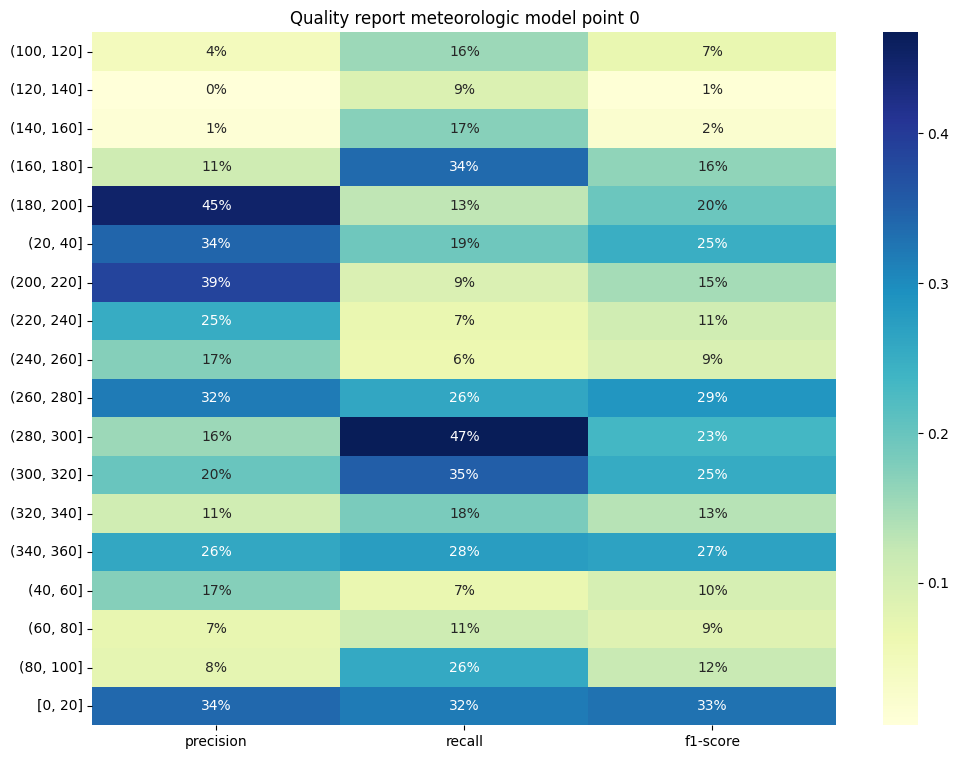

In [ ]:
plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model point 0")
cr = pd.DataFrame(classification_report(df_all_w.dir_l, df_all_w.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

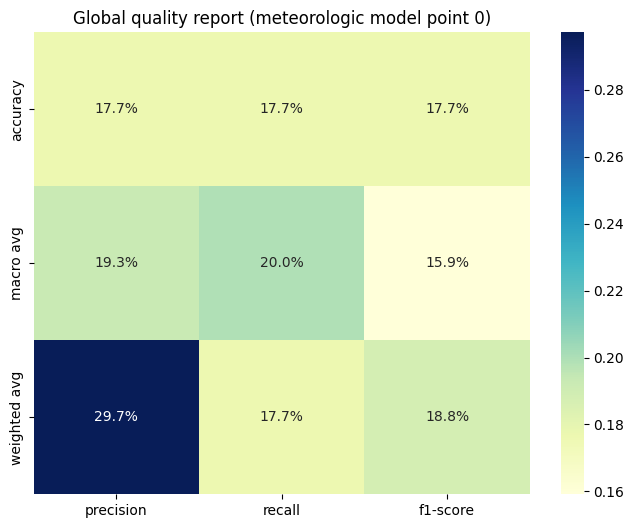

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 0)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

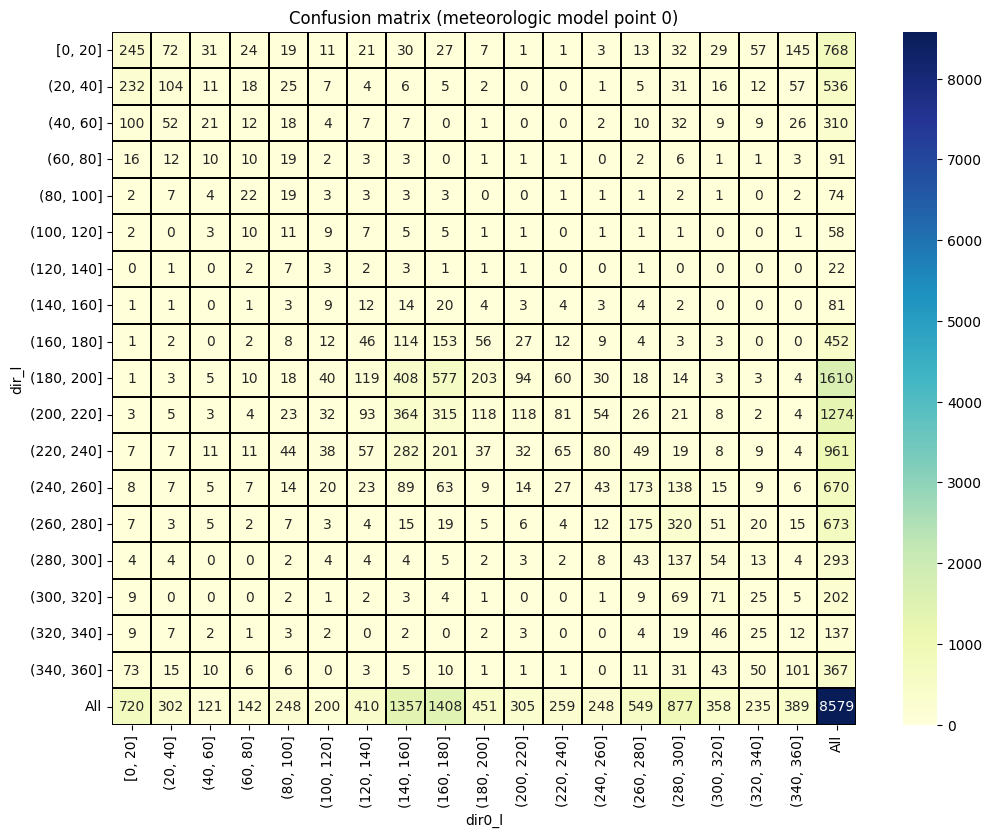

In [ ]:
plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model point 0)")

global_sc = pd.crosstab(df_all_w.dir_l, df_all_w.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');

<ipython-input-59-caa7ff85e56e>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



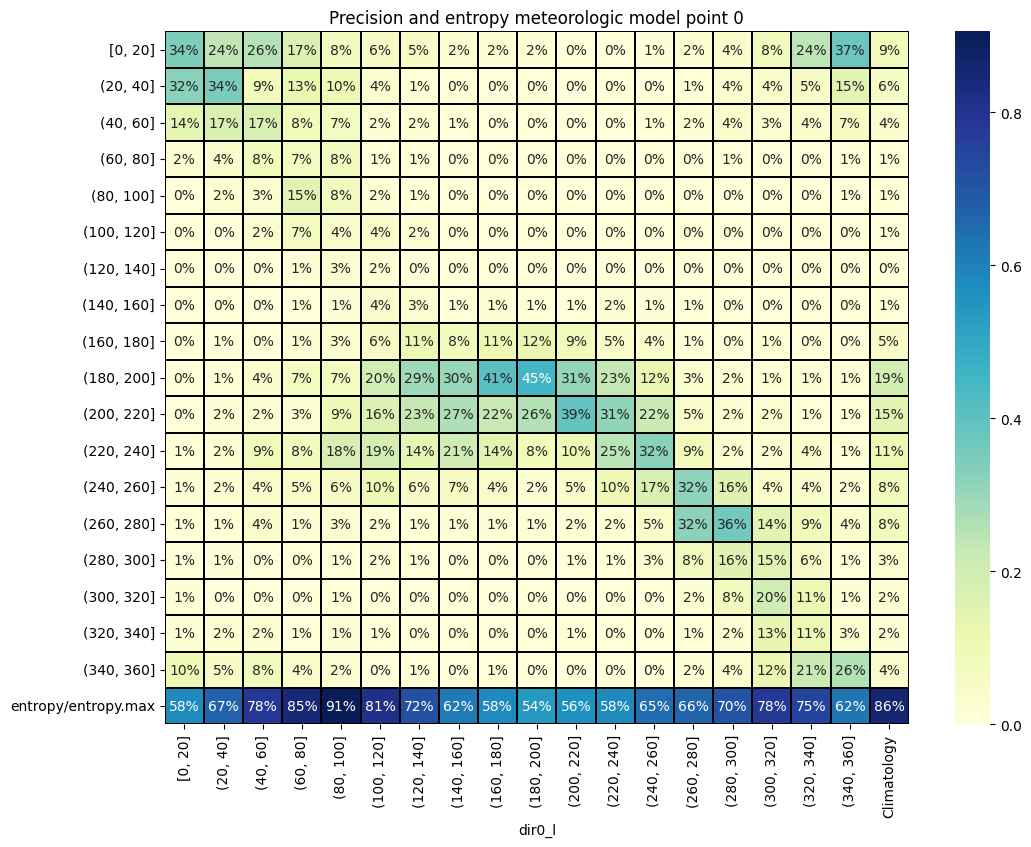

In [ ]:
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model point 0")
column_sc = pd.crosstab(df_all_w.dir_l, df_all_w.dir0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');

In [ ]:
df_vrb_w["hour"] = df_vrb_w.index.hour
df_vrb_w["month"] = df_vrb_w.index.month
df_vrb_w["dayofyear"] = df_vrb_w.index.dayofyear
df_vrb_w["weekofyear"] = df_vrb_w.index.isocalendar().week.astype(int)

In [ ]:
df_vrb_w.columns

Index(['dir_o', 'dir_l', 'dir0', 'snow_prec0', 'snowlevel0', 'mod0',
       'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0', 'lhflx0',
       'lwflx0', 'conv_prec0', 'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0',
       'cfh0', 'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500',
       'dir1', 'snow_prec1', 'snowlevel1', 'mod1', 'wind_gust1', 'mslp1',
       'temp1', 'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1',
       'prec1', 'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
       'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object')

<ipython-input-62-19454369453e>:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.166667  0.166667  0.166667     6.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.200000  0.062500  0.095238    16.000000
(160, 180]     0.358491  0.316667  0.336283    60.000000
(180, 200]     0.555556  0.632653  0.591603   245.000000
(20, 40]       0.271605  0.333333  0.299320    66.000000
(200, 220]     0.456790  0.357488  0.401084   207.000000
(220, 240]     0.375000  0.428571  0.400000   140.000000
(240, 260]     0.345238  0.302083  0.322222    96.000000
(260, 280]     0.366667  0.423077  0.392857   104.000000
(280, 300]     0.285714  0.205128  0.238806    39.000000
(300, 320]     0.321429  0.300000  0.310345    30.000000
(320, 340]     0.266667  0.181818  0.216216    22.000000
(340, 360]     0.514286  0.327273  0.400000    55.000000
(40, 60]       0.153846  0.081633  0.106667    49.000000
(60, 80]       0.500000  0.062500  0.111111    16.00

<ipython-input-62-19454369453e>:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.250000  0.142857  0.181818     7.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.400000  0.142857  0.210526    14.000000
(160, 180]     0.464286  0.371429  0.412698    70.000000
(180, 200]     0.552542  0.668033  0.604824   244.000000
(20, 40]       0.428571  0.375000  0.400000    72.000000
(200, 220]     0.429379  0.397906  0.413043   191.000000
(220, 240]     0.375887  0.398496  0.386861   133.000000
(240, 260]     0.428571  0.289474  0.345550   114.000000
(260, 280]     0.481818  0.509615  0.495327   104.000000
(280, 300]     0.294118  0.212766  0.246914    47.000000
(300, 320]     0.320000  0.285714  0.301887    28.000000
(320, 340]     0.583333  0.318182  0.411765    22.000000
(340, 360]     0.378378  0.269231  0.314607    52.000000
(40, 60]       0.208333  0.102041  0.136986    49.000000
(60, 80]       0.083333  0.142857  0.105263     7.00

<ipython-input-62-19454369453e>:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     4.000000
(120, 140]     0.000000  0.000000  0.000000     6.000000
(140, 160]     0.666667  0.333333  0.444444    12.000000
(160, 180]     0.428571  0.305085  0.356436    59.000000
(180, 200]     0.538961  0.658730  0.592857   252.000000
(20, 40]       0.273973  0.322581  0.296296    62.000000
(200, 220]     0.448087  0.424870  0.436170   193.000000
(220, 240]     0.396947  0.376812  0.386617   138.000000
(240, 260]     0.282051  0.229167  0.252874    96.000000
(260, 280]     0.542373  0.542373  0.542373   118.000000
(280, 300]     0.347826  0.166667  0.225352    48.000000
(300, 320]     0.240000  0.222222  0.230769    27.000000
(320, 340]     0.250000  0.043478  0.074074    23.000000
(340, 360]     0.324324  0.230769  0.269663    52.000000
(40, 60]       0.250000  0.159091  0.194444    44.000000
(60, 80]       0.250000  0.071429  0.111111    14.00

<ipython-input-62-19454369453e>:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)

              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     7.000000
(120, 140]     0.000000  0.000000  0.000000     5.000000
(140, 160]     0.400000  0.250000  0.307692     8.000000
(160, 180]     0.311111  0.229508  0.264151    61.000000
(180, 200]     0.535971  0.642241  0.584314   232.000000
(20, 40]       0.412500  0.434211  0.423077    76.000000
(200, 220]     0.493590  0.405263  0.445087   190.000000
(220, 240]     0.309677  0.406780  0.351648   118.000000
(240, 260]     0.360000  0.272727  0.310345    99.000000
(260, 280]     0.467213  0.504425  0.485106   113.000000
(280, 300]     0.225806  0.148936  0.179487    47.000000
(300, 320]     0.357143  0.250000  0.294118    40.000000
(320, 340]     0.266667  0.210526  0.235294    19.000000
(340, 360]     0.340426  0.340426  0.340426    47.000000
(40, 60]       0.315789  0.196721  0.242424    61.000000
(60, 80]       0.416667  0.416667  0.416667    12.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<ipython-input-62-19454369453e>:47: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Quality report (Machine Learning)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000    10.000000
(120, 140]     0.000000  0.000000  0.000000     1.000000
(140, 160]     0.250000  0.071429  0.111111    14.000000
(160, 180]     0.265306  0.236364  0.250000    55.000000
(180, 200]     0.538194  0.627530  0.579439   247.000000
(20, 40]       0.421053  0.328767  0.369231    73.000000
(200, 220]     0.424581  0.406417  0.415301   187.000000
(220, 240]     0.380282  0.360000  0.369863   150.000000
(240, 260]     0.406593  0.355769  0.379487   104.000000
(260, 280]     0.468750  0.504202  0.485830   119.000000
(280, 300]     0.314286  0.229167  0.265060    48.000000
(300, 320]     0.344828  0.333333  0.338983    30.000000
(320, 340]     0.200000  0.066667  0.100000    30.000000
(340, 360]     0.368421  0.237288  0.288660    59.000000
(40, 60]       0.187500  0.171429  0.179104    35.000000
(60, 80]       0.200000  0.090909  0.125000    11.000000
(80, 100]      0.222222  0.2222

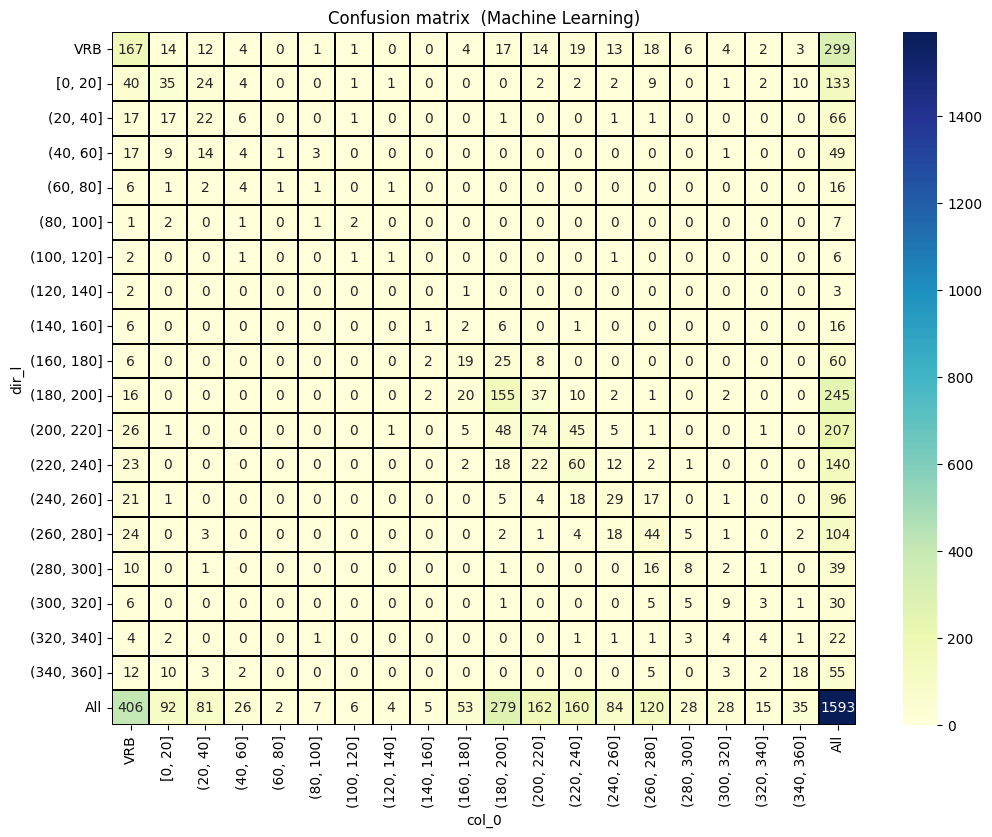

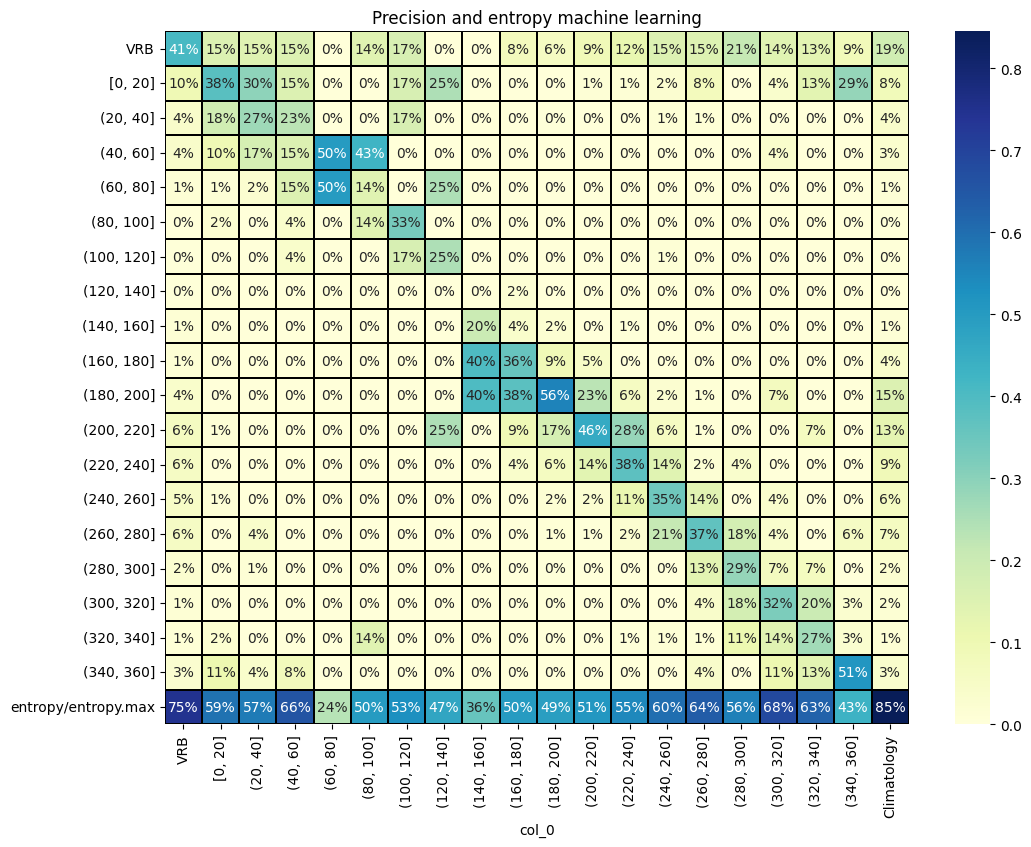

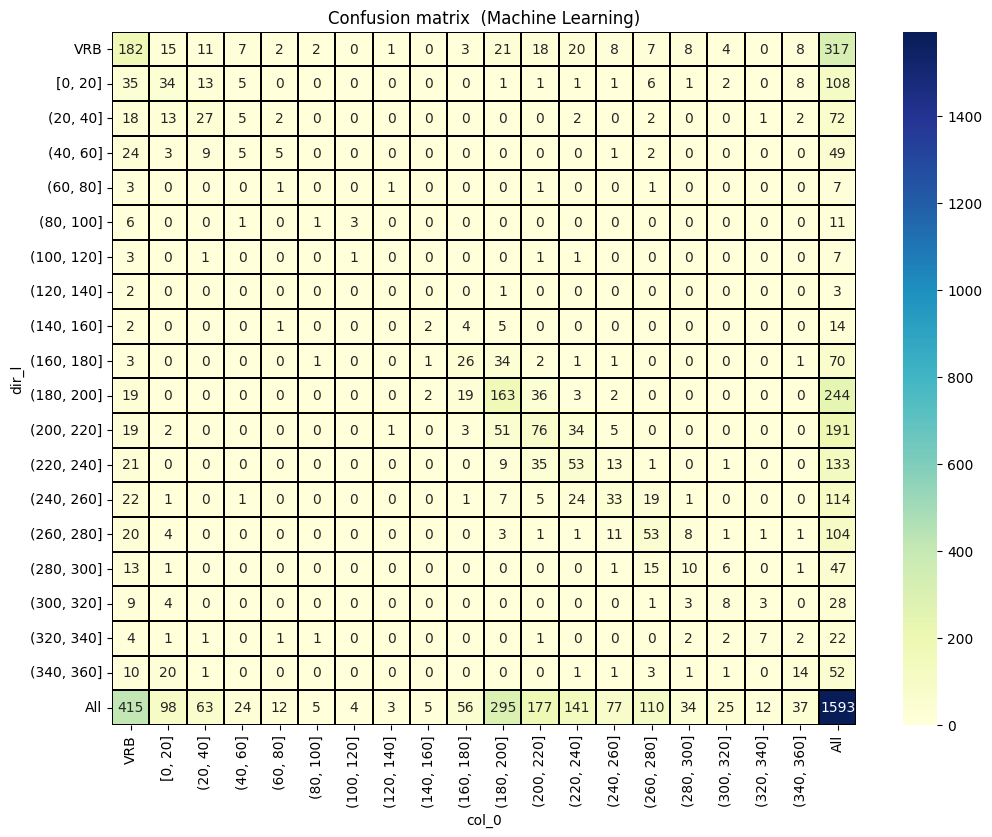

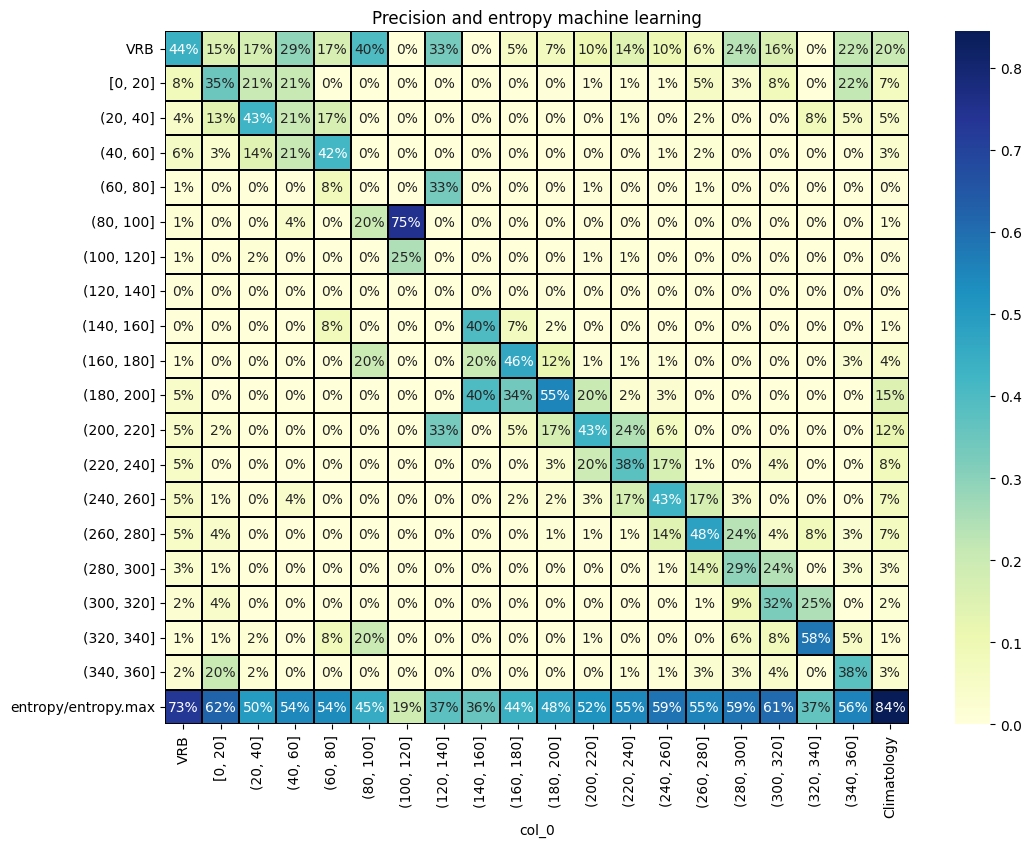

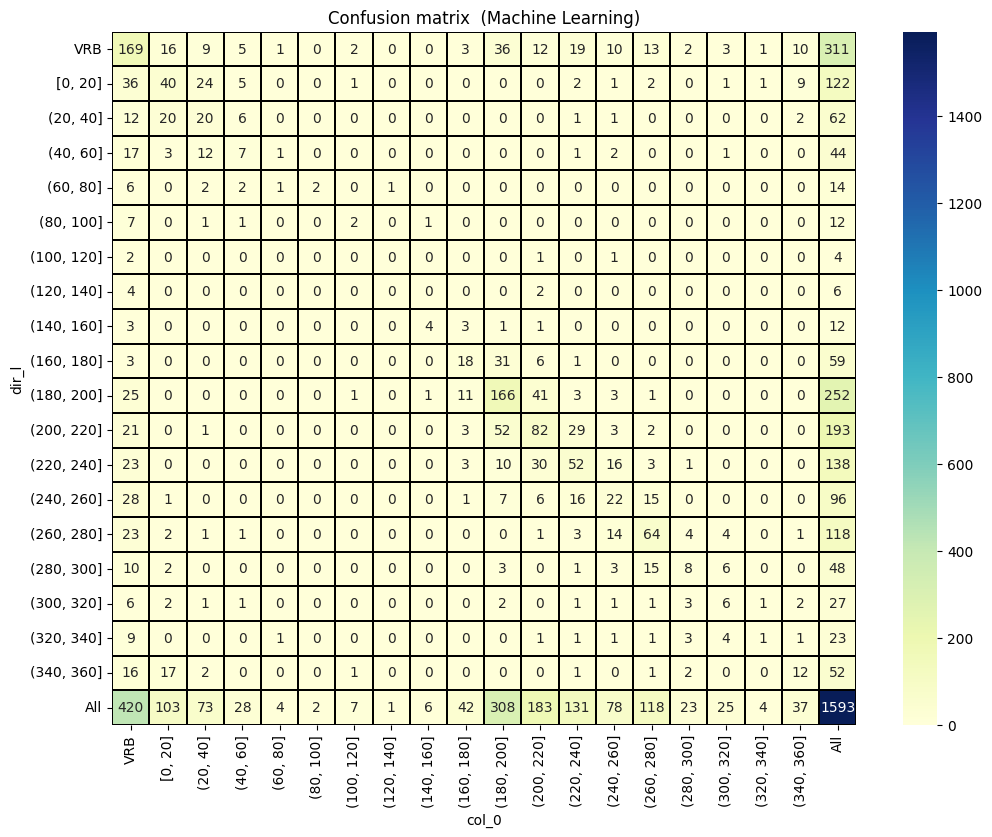

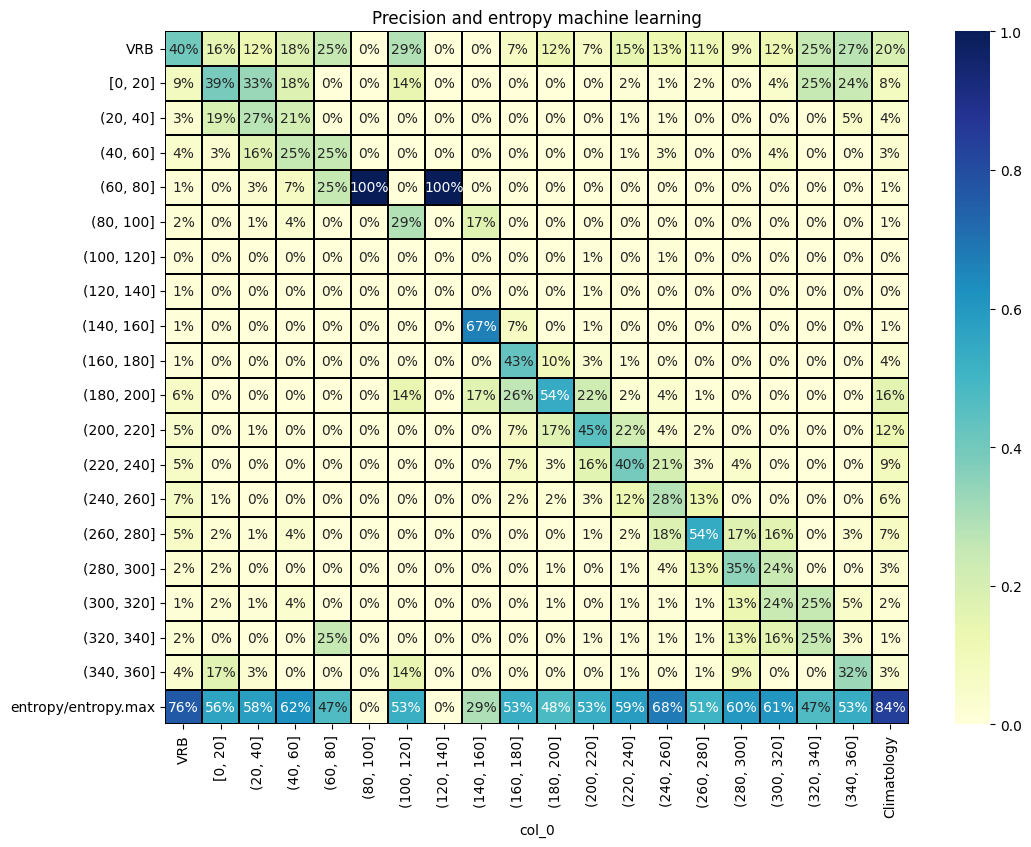

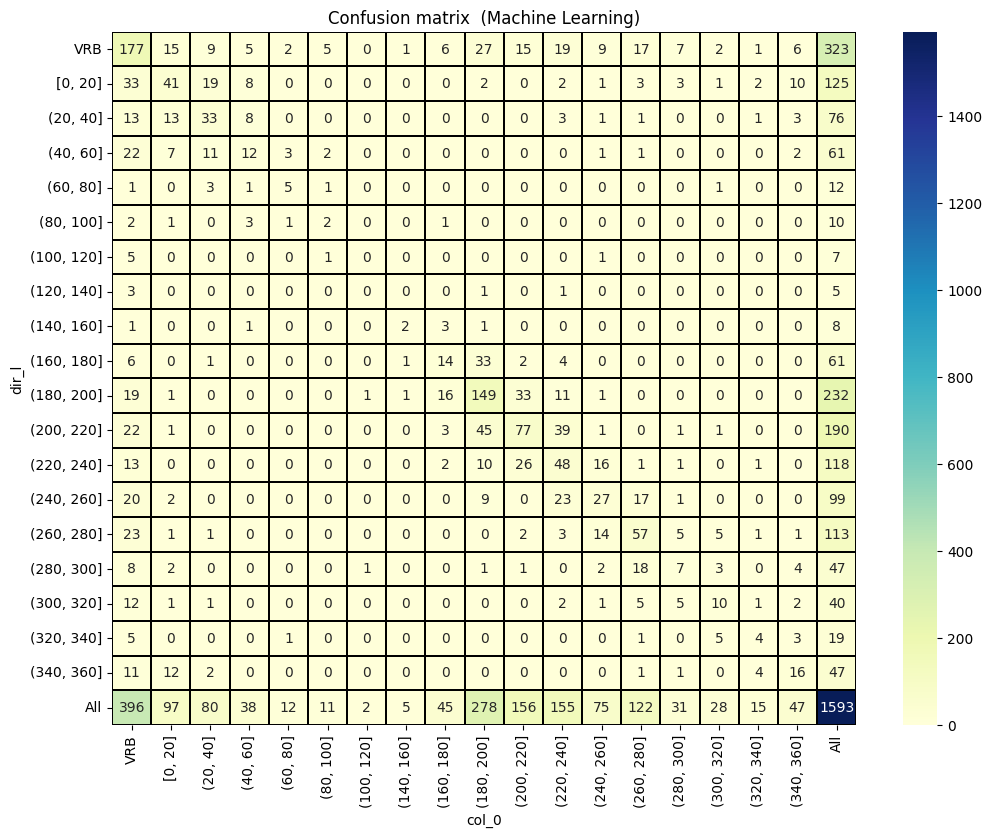

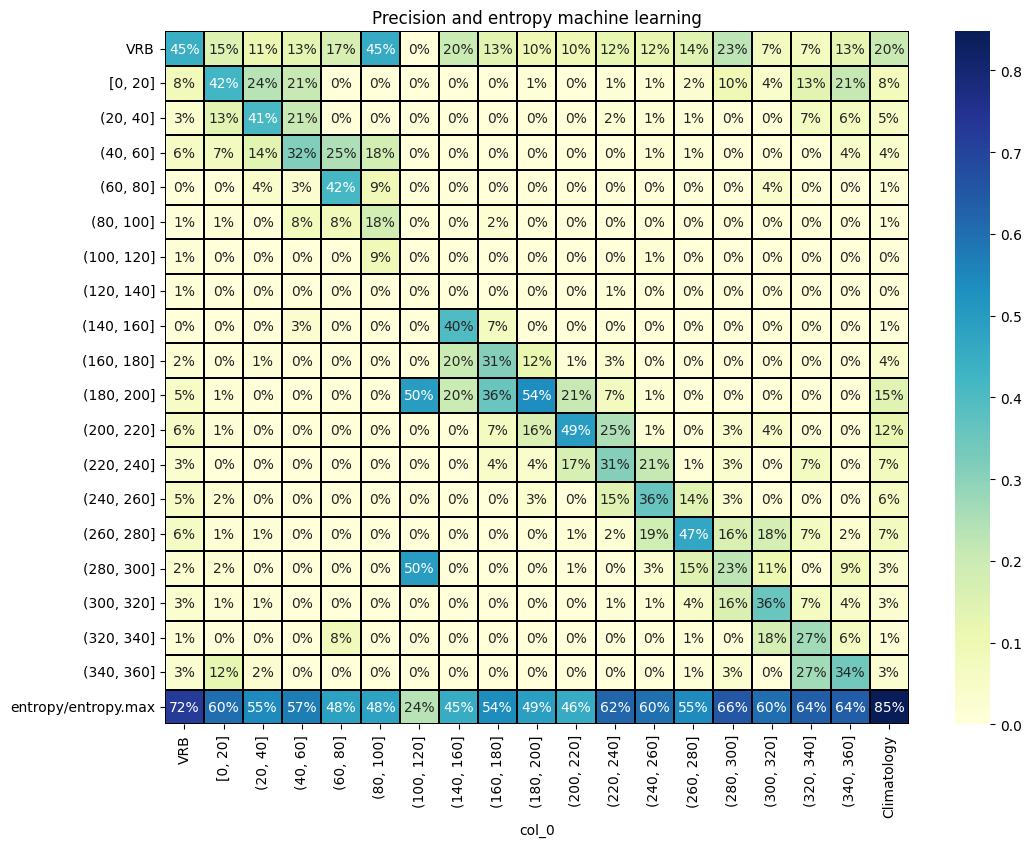

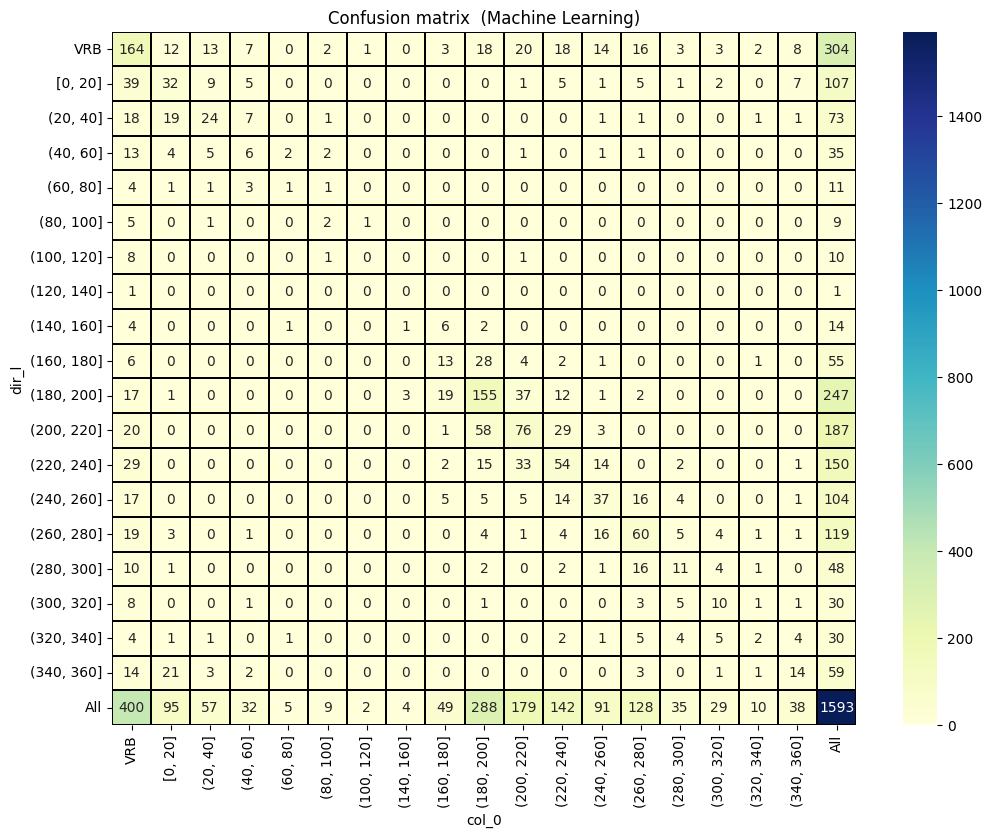

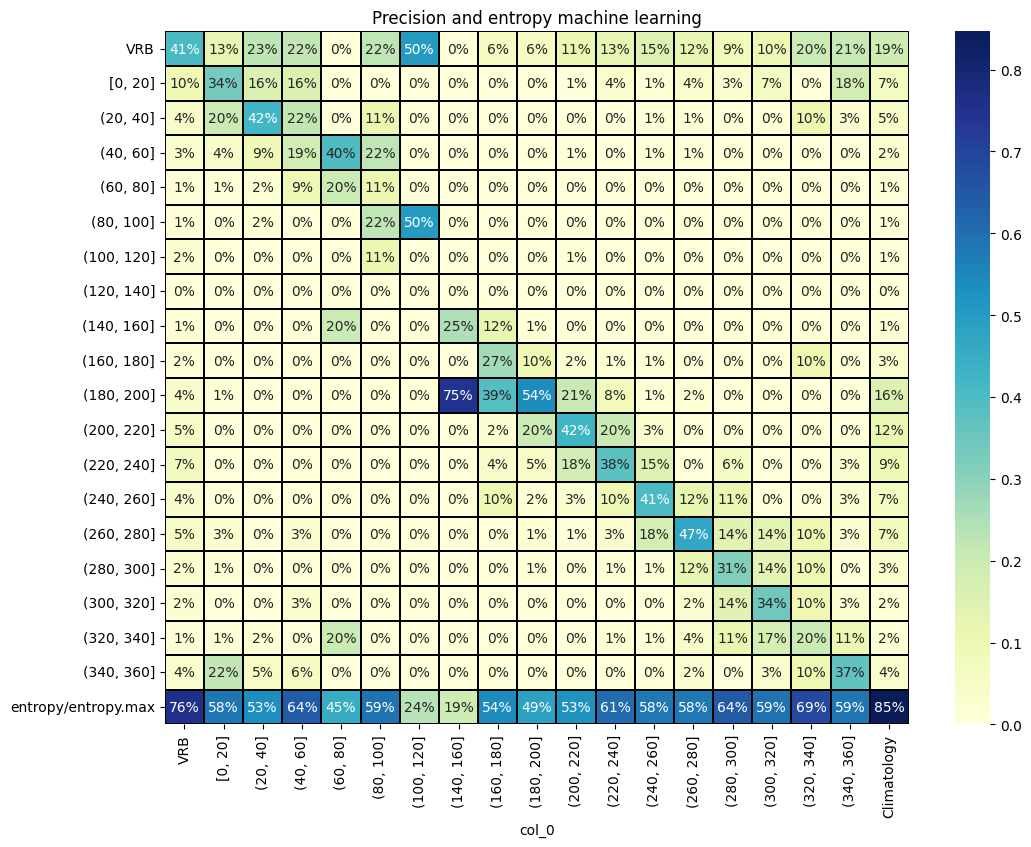

In [ ]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# X and Y
Y = df_vrb_w.dir_l
X = df_vrb_w[['dir0', 'snow_prec0', 'snowlevel0', 'mod0',
       'wind_gust0', 'mslp0', 'temp0', 'rh0', 'visibility0', 'lhflx0',
       'lwflx0', 'conv_prec0', 'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0',
       'cfh0', 'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500',
       'dir1', 'snow_prec1', 'snowlevel1', 'mod1', 'wind_gust1', 'mslp1',
       'temp1', 'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1',
       'prec1', 'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1',
       'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501', 'hour', 'month',
       'dayofyear', 'weekofyear']]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,5):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #ml_model = RandomForestClassifier().fit(X_train,y_train)
  ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  plt.figure(figsize=(12, 9))
  plt.title("Confusion matrix  (Machine Learning)")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  comuns = [element for element in labels+["All"] if element in cm.columns]
  sns.heatmap(cm[comuns],annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');

  plt.figure(figsize=(12, 9))
  plt.title("Precision and entropy machine learning")
  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
  comuns = [element for element in labels+["Climatology"] if element in column_sc.columns]                  
  sns.heatmap(column_sc[comuns],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\n accuracy mean of samples: ",acc_ml)

In [ ]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 5.0%
snow_prec0: 0.0%
snowlevel0: 2.2%
mod0: 2.5%
wind_gust0: 2.6%
mslp0: 2.2%
temp0: 2.3%
rh0: 2.3%
visibility0: 1.7%
lhflx0: 2.1%
lwflx0: 2.3%
conv_prec0: 0.0%
prec0: 0.6%
swflx0: 1.5%
shflx0: 2.1%
cape0: 1.1%
cin0: 1.8%
cfh0: 1.3%
cfl0: 1.0%
cfm0: 0.9%
cft0: 1.5%
HGT5000: 2.1%
HGT8500: 2.1%
T5000: 2.2%
T8500: 2.2%
dir1: 5.2%
snow_prec1: 0.0%
snowlevel1: 2.1%
mod1: 2.7%
wind_gust1: 2.7%
mslp1: 2.1%
temp1: 2.3%
rh1: 2.2%
visibility1: 1.7%
lhflx1: 2.1%
lwflx1: 2.3%
conv_prec1: 0.0%
prec1: 0.6%
swflx1: 1.5%
shflx1: 2.2%
cape1: 1.1%
cin1: 1.8%
cfh1: 1.3%
cfl1: 1.1%
cfm1: 0.9%
cft1: 1.4%
HGT5001: 2.1%
HGT8501: 2.1%
T5001: 2.1%
T8501: 2.2%
hour: 2.8%
month: 1.7%
dayofyear: 2.1%
weekofyear: 2.0%


In [ ]:
acc_ml

[0.41, 0.44, 0.42, 0.43, 0.42]